# Importing Libraries

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')
# Import Libraries
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_context("talk", font_scale = 0.65, rc={"grid.linewidth": 5})
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 400)
from sklearn.linear_model import LogisticRegression,LinearRegression,LassoCV,Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer
from scipy.stats import skew

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Checking the shape
print(telecom.shape)
print('\n')
# Checking Dataset Info 
print(telecom.info(verbose=True,null_counts=True))

(99999, 226)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  flo

In [4]:
#Summary and checking outliers
telecom.describe(percentiles=[0.25,0.5,0.75,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
#Function to check percentage of null values present in dataset 
def calnullpercentage(df):
    missing_num= df[df.columns].isna().sum().sort_values(ascending=False)
    missing_perc= (df[df.columns].isna().sum()/len(df)*100).sort_values(ascending=False)
    missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
    missing= missing[missing['Percentage']>0]
    return missing

In [6]:
# check the %age of null values
calnullpercentage(telecom)


,Total,Percentage
count_rech_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748


In [7]:
# Number of columns having null values
print(len(calnullpercentage(telecom)))

166


`Out of 226 columns 166 have null values`

In [8]:
#Checking categorical and numerical columns 
telecom.select_dtypes(include='object').head(3)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014


In [9]:
#Finding categorical columns where dtype is float but those columns are having 0 or 1 values only
catg= []
for col in telecom.columns:
    if len(telecom[col].unique())== 2 | 3:
        catg.append(col)
catg

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

## Filter high-value customers
We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [10]:
# Deriving new columns for total recharge amount data for 6 and 7th month
telecom['tot_rech_amt_data_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['tot_rech_amt_data_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
# Deriving new columns for total amount spent during  6 and 7th month
telecom['tot_amt_6'] = telecom[['total_rech_amt_6','tot_rech_amt_data_6']].sum(axis=1)
telecom['tot_amt_7'] = telecom[['total_rech_amt_7','tot_rech_amt_data_7']].sum(axis=1)
#first two months average
telecom['avg_amt_6_7'] = telecom[['tot_amt_6','tot_amt_7']].mean(axis=1)
# Filtering customers based on percentile having goodphase_avg more than or equal to cutoff of 70th percentile
telecom=telecom.loc[(telecom['avg_amt_6_7'] >= np.percentile(telecom['avg_amt_6_7'], 70))]
telecom.shape

(30001, 231)

` I have taken  recharge amount `more than or equal to X`, where X is the 70th percentile of the average recharge amount in the first two months and getting 30k rows. If I use `more than(>)sign`, will get 29.9k rows, but going with problem statement.`

In [11]:
# Deriving new columns for total recharge amount data for 8 and 9th month
telecom['tot_rech_amt_data_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['tot_rech_amt_data_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']
# Deriving new columns for total amount spent during  8 and 9th month
telecom['tot_amt_8'] = telecom[['total_rech_amt_8','tot_rech_amt_data_8']].sum(axis=1)
telecom['tot_amt_9'] = telecom[['total_rech_amt_9','tot_rech_amt_data_9']].sum(axis=1)

In [12]:
# COnverting into categorical or object type
telecom[catg]=telecom[catg].apply(lambda x:x.astype('object'))
col_tmp=['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9','total_rech_data_6',\
        'total_rech_data_7','total_rech_data_8','total_rech_data_9']
telecom[col_tmp]=telecom[col_tmp].apply(lambda x:x.astype('object'))

<AxesSubplot:>

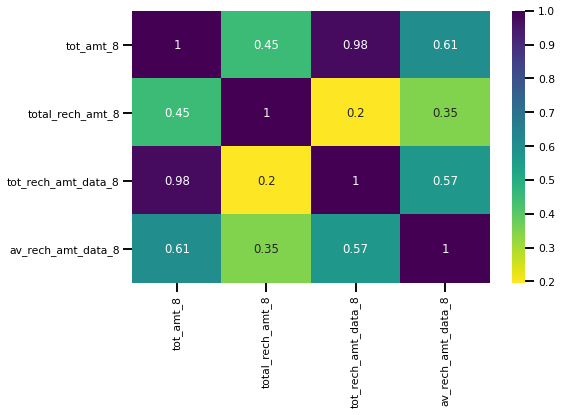

In [13]:
x=['tot_amt_8','total_rech_amt_8','tot_rech_amt_data_8','total_rech_data_8','av_rech_amt_data_8']
plt.figure(figsize=(8,5))
sns.heatmap(telecom[x].corr(),annot=True,cmap='viridis_r')

#### Dropping Redundant columns, since we have already created derived features from them and derived features reflects the same information.

In [14]:
telecom.drop(['tot_rech_amt_data_6','tot_rech_amt_data_7','tot_rech_amt_data_8',\
              'tot_rech_amt_data_9'],inplace=True,axis=1)


## Identifying CHURN CUSTOMERS 

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [15]:
# Where summation of columns = 0 then churn =1  else 0
telecom['churn']= np.where(telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9',\
                                    'vol_3g_mb_9']].sum(axis=1)== 0,1,0)

In [16]:
# Removing all features having ‘ _9’, etc. in their names
telecom.drop(telecom.filter(regex='_9|sep', axis = 1).columns, axis=1,inplace=True)

In [17]:
## Churn Percentage
pd.DataFrame(round(telecom['churn'].value_counts(normalize=True)*100,2))

,churn
0,91.86
1,8.14


` approximately 92% customers not churned and 8% customers got churned. Also, we can see class imbalance is there and we will deal with it later` 

<b>`For each feature, it counts the values of that feature. If the most recurrent value of the feature is repeated almost in all the instances (*zeros / len(X) * 100 > 95*). Then it drops these features because their values are almost the same for all instances and will not help in learning process and those features are not useful in our prediction.`

In [18]:
telecom.shape

(30001, 176)

In [19]:
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 95:
            redundant.append(i)
    redundant = list(redundant)
    return redundant



In [20]:
print('Before dropping Redundant features: ',telecom.shape)
redundant_features = redundant_feature(telecom)
telecom = telecom.drop(redundant_features, axis=1)
print('After dropping Redundant features: ',telecom.shape)

Before dropping Redundant features:  (30001, 176)
After dropping Redundant features:  (30001, 161)


`Function to impute NaN values where %age of missing values > 40%, Reason for taking cutoff 40% is beacuse for these columns we can replace NaN with 0(for example, fb_user_7, not used facebook(NaN),av_rech_amt_data_8, not done recharge(NaN) similarly for other columns.`

In [21]:
#Function to impute NaN with 0
def imputeNaN(df,col_name):
    for col in col_name:
        df[col].fillna(0,inplace=True)
col_40= calnullpercentage(telecom)[calnullpercentage(telecom)['Percentage']>40].index
#call function
imputeNaN(telecom,col_40)

In [22]:
# checking %age of null values
calnullpercentage(telecom)

,Total,Percentage
std_ic_t2f_mou_8,1174,3.913203
ic_others_8,1174,3.913203
loc_og_t2c_mou_8,1174,3.913203
loc_og_mou_8,1174,3.913203
loc_ic_t2m_mou_8,1174,3.913203
loc_og_t2f_mou_8,1174,3.913203
loc_og_t2m_mou_8,1174,3.913203
loc_ic_t2f_mou_8,1174,3.913203
std_og_t2f_mou_8,1174,3.913203
loc_og_t2t_mou_8,1174,3.913203


In [23]:
pd.DataFrame((telecom[calnullpercentage(telecom).index]==0).sum()).head(10)

,0
std_ic_t2f_mou_8,21248
ic_others_8,21405
loc_og_t2c_mou_8,21262
loc_og_mou_8,2379
loc_ic_t2m_mou_8,1364
loc_og_t2f_mou_8,14422
loc_og_t2m_mou_8,2576
loc_ic_t2f_mou_8,9189
std_og_t2f_mou_8,24613
loc_og_t2t_mou_8,3887


` As we can see from above missing value dataframe and value count == 0, large percentage of values are zero in missing value columns. I can impute most missing value column having NaN value with 0 if I assume that they have not use local incoming service, special outgoing service that is why these columns have NaN values. But this assumption doesn't helping much beacuse most values in these columns have 0 and it infers the same thing. So dropping these missing value columns.`

In [24]:
telecom= telecom.dropna()
telecom.shape

(28163, 161)

`After dropping missing values will result in dropping 1838 or 6% rows`

In [25]:
# Checking missing value percentage if any
calnullpercentage(telecom) #no missing value

,Total,Percentage


In [26]:
telecom.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_amt_6,tot_amt_7,avg_amt_6_7,tot_amt_8,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1580.0,790.0,1185.0,3638.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0,7/31/2014,8/23/2014,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,437.0,955.

In [27]:
# no duplicate mobile number
len(telecom['mobile_number'].unique())

28163

In [28]:
#Dropping mobile number since it doesn't help in modelling and prediction 
telecom.drop('mobile_number',inplace=True,axis=1)

# Data Visualisation and EDA

#### Function to show values on bar plot

In [29]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

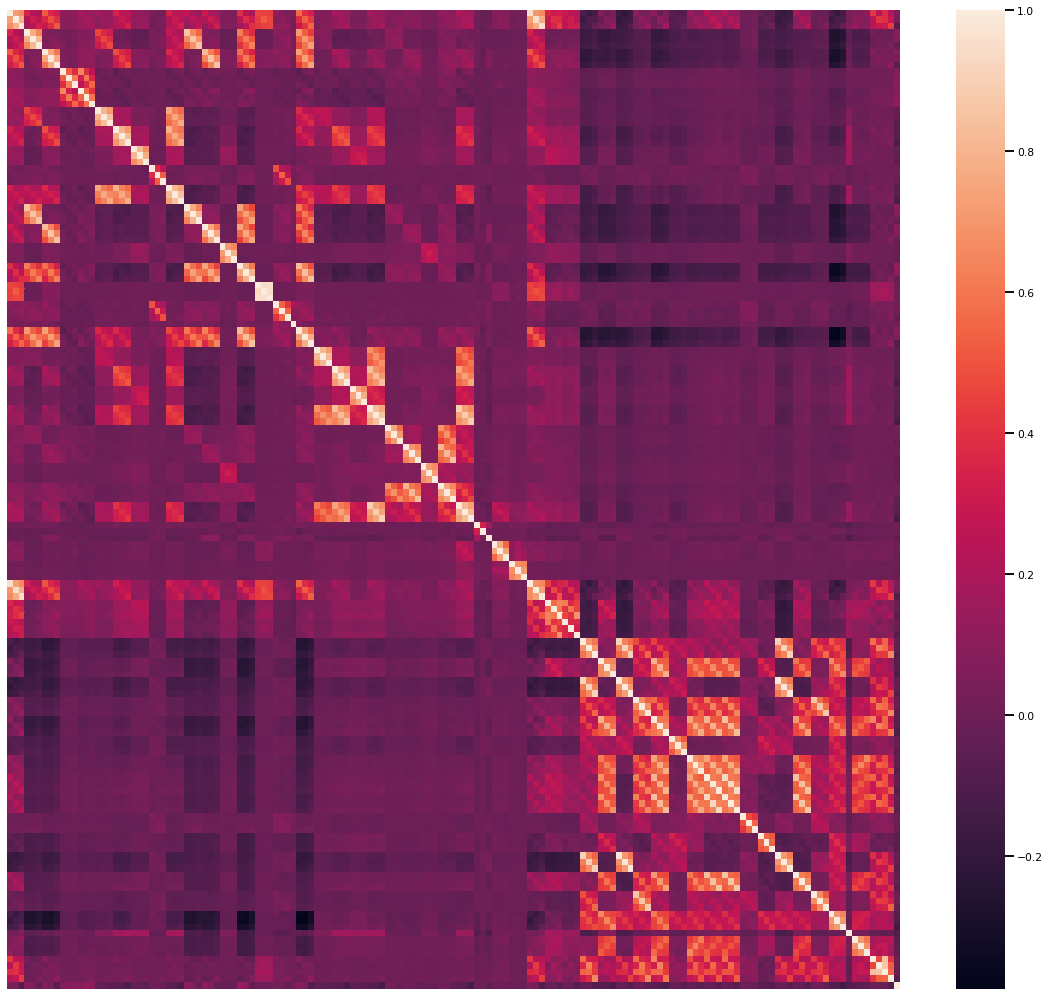

In [30]:
#### Correlation between numerical variables
plt.figure(figsize=(20,18))
ax=sns.heatmap(telecom.corr())
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

`As we can see from the graph, correlation is present between features. We will take care of correlated features later using techniques like PCA, t-SNE or any  other suitable technique for this problem`

In [31]:
# Function to plot distribution plot for months(6,7 and 8) for churn and non churn customers. 
# Also, plotting box plot and strip plot for the same.
def dist_box_plot(df,col1,col2,col3):    
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col1], bins = 40, ax = axes[0], kde = False,\
                      color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col1], bins = 40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==1][col2], bins = 40, ax = axes[2], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col2], bins = 40, ax = axes[3], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
    ax=sns.boxplot(x='churn', y=col1, data=df,ax=axes[0])
    ax=sns.stripplot(x='churn', y=col1, data=df, jitter=True, edgecolor="gray",ax=axes[0])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col1,fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col2, data=df,ax=axes[1])
    ax=sns.stripplot(x='churn', y=col2, data=df, jitter=True, edgecolor="gray",ax=axes[1])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col2,fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col3], bins = 40, ax = axes[0], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col3],bins=40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col3, data=df,ax=axes[2])
    ax=sns.stripplot(x='churn', y=col3, data=df, jitter=True, edgecolor="gray",ax=axes[2])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col3,fontweight='bold',size=20)
    plt.show()

## arpu (Average Revenue per user)

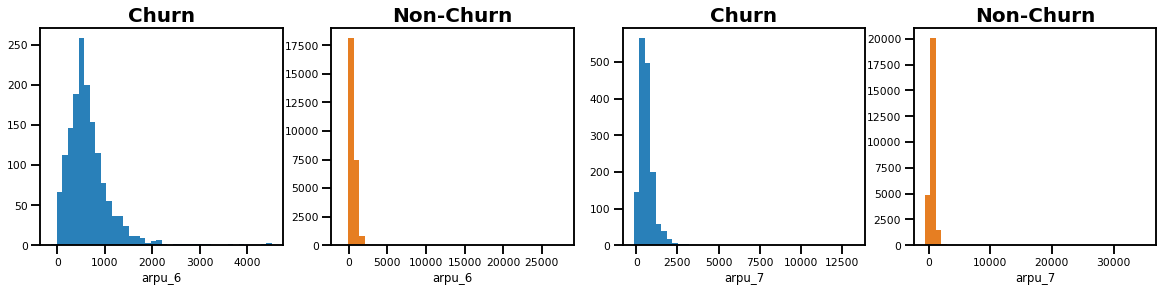

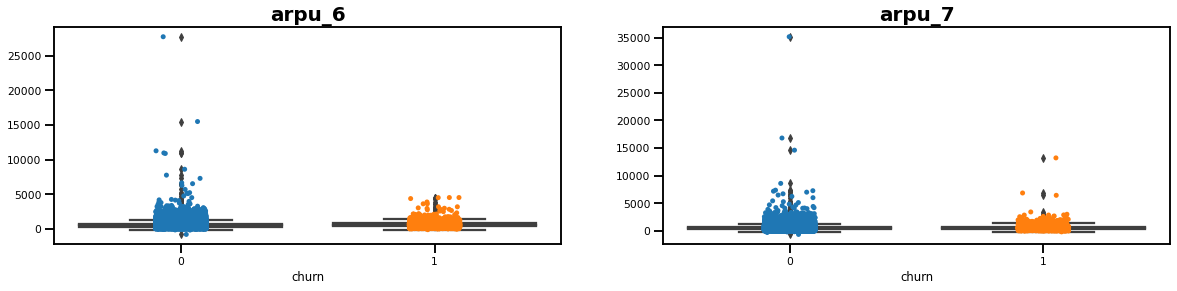

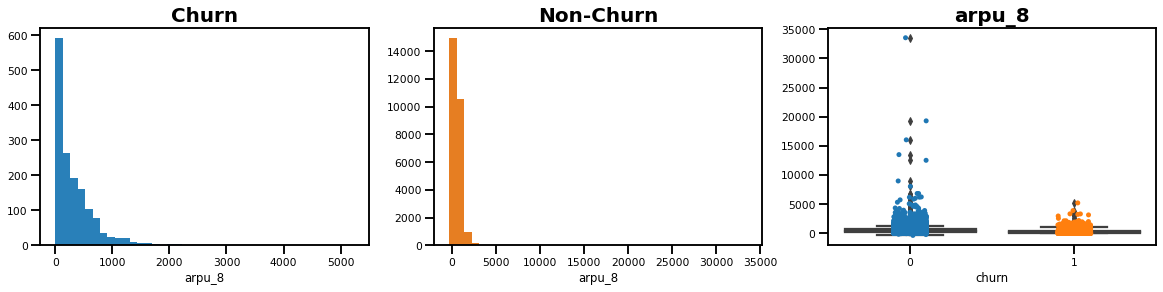

In [32]:
dist_box_plot(telecom,'arpu_6','arpu_7','arpu_8')

### onnnet_mou (Minutes of usage for all kind of calls within the same operator network)

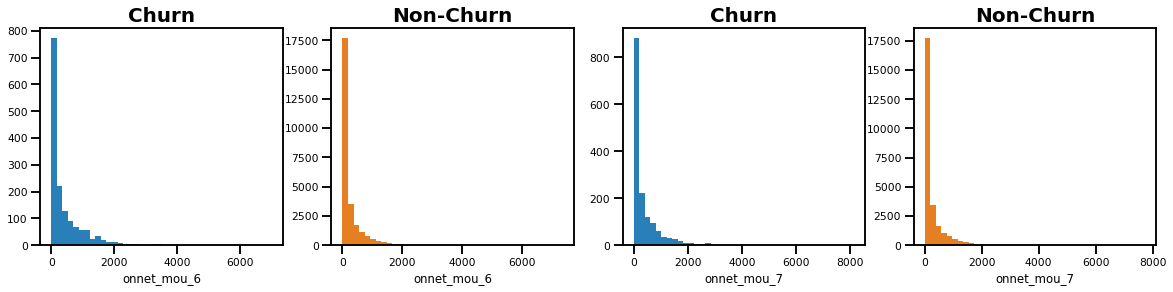

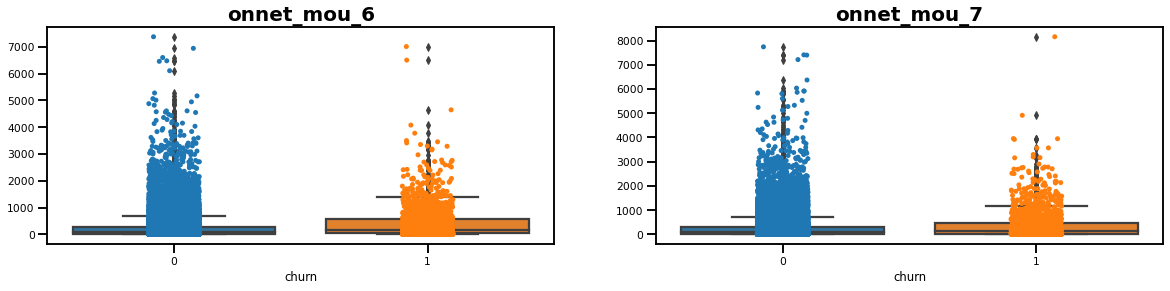

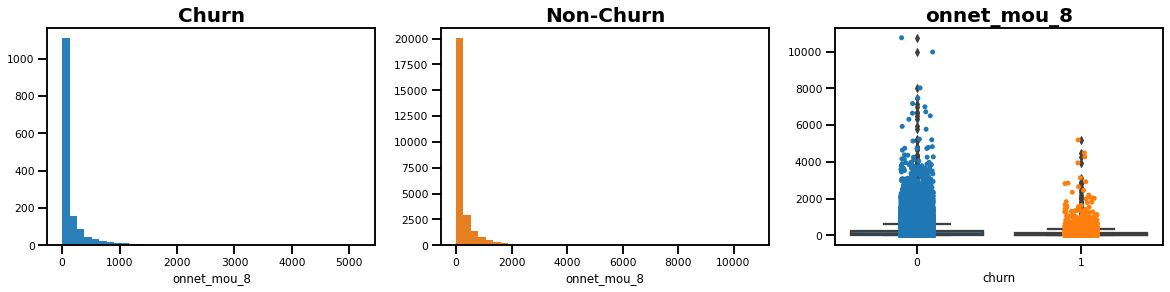

In [33]:
dist_box_plot(telecom,'onnet_mou_6','onnet_mou_7','onnet_mou_8')

### offnet_mou (Minutes of usage for All kind of calls outside the operator T network)

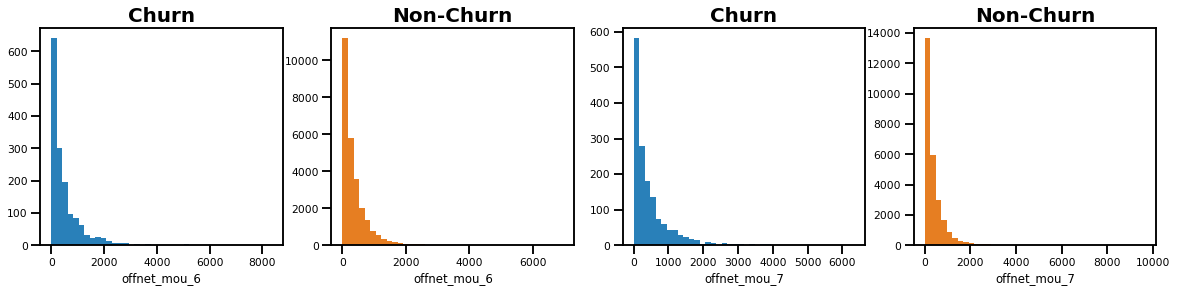

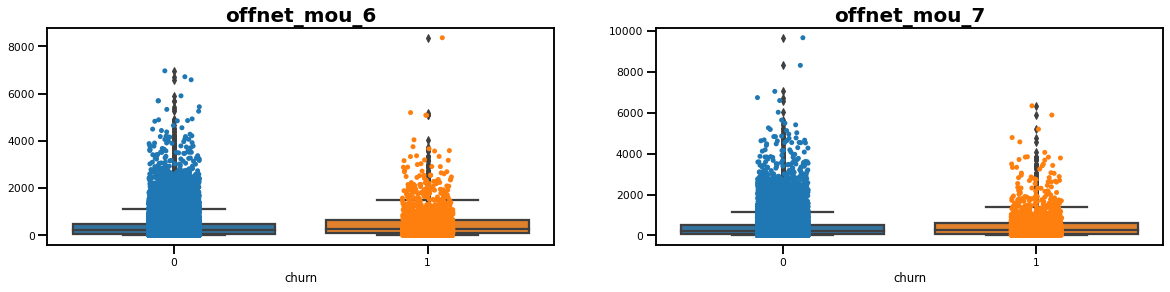

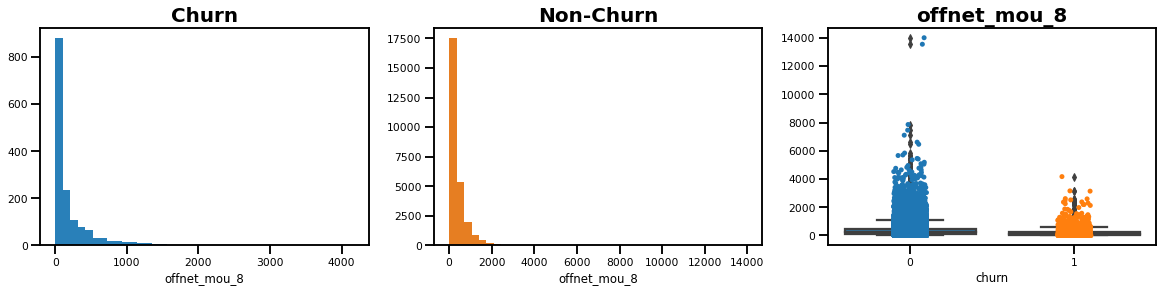

In [34]:
dist_box_plot(telecom,'offnet_mou_6','offnet_mou_7','offnet_mou_8')

### roam_ic_mou (Minutes of usage on roaming incoming calls)

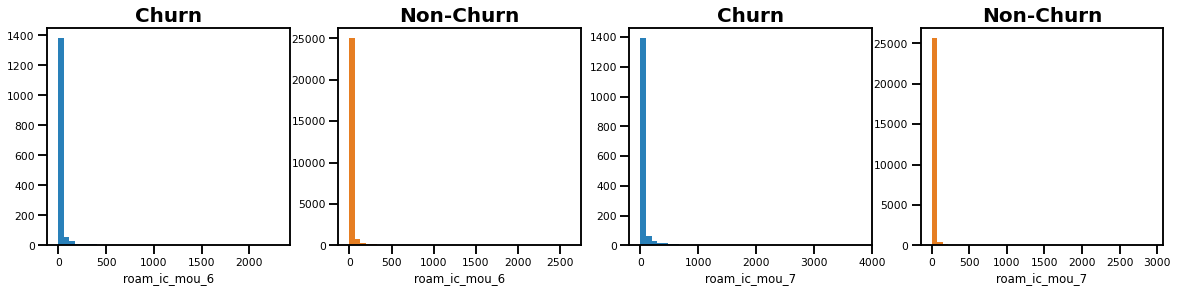

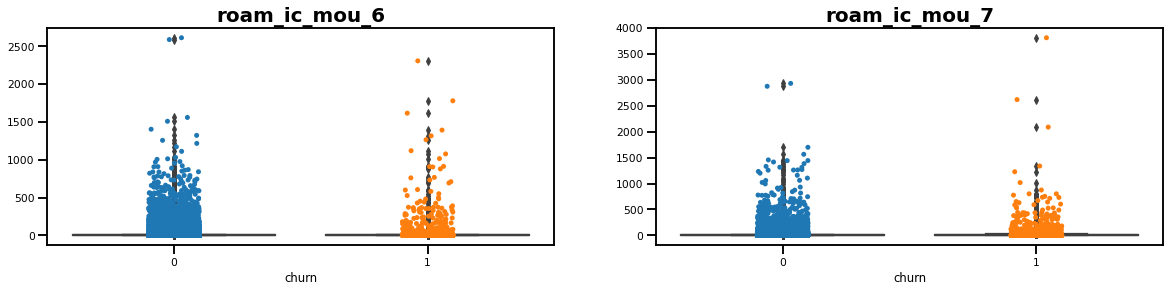

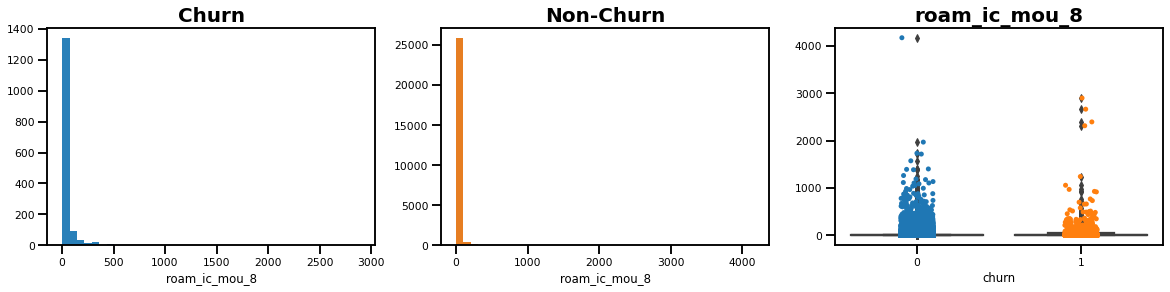

In [35]:
dist_box_plot(telecom,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8')

### loc_og_t2t_mou (Minutes of usage within same operator on local outgoing calls)

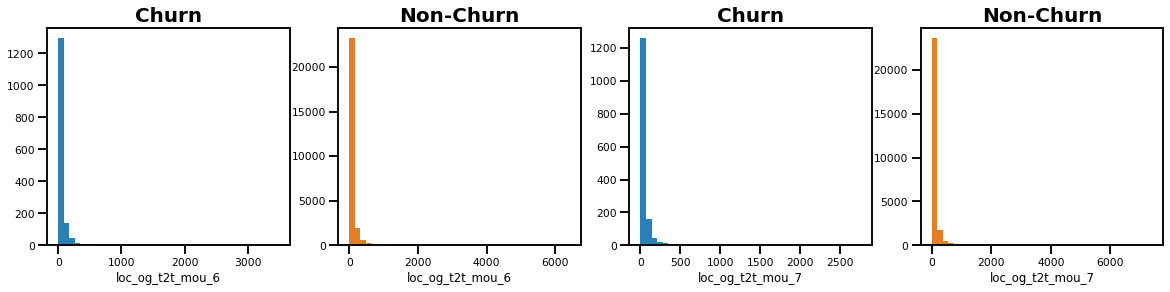

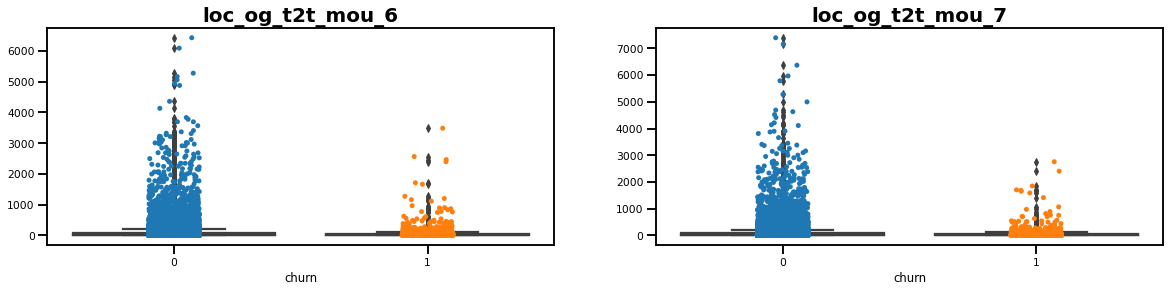

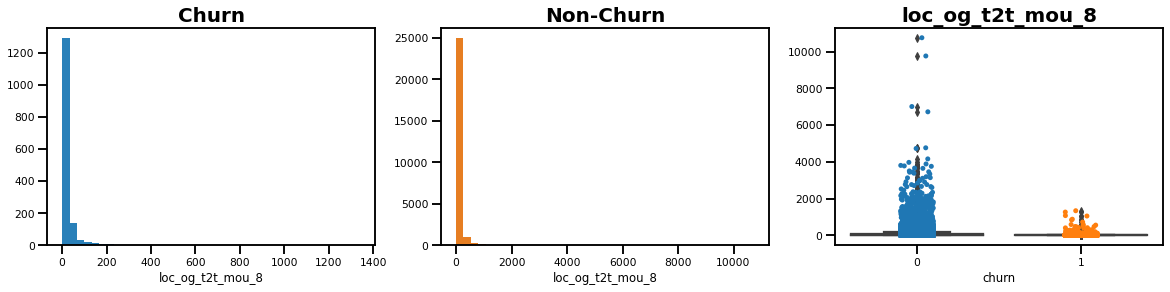

In [36]:
dist_box_plot(telecom,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')

### loc_og_t2m_mou  (Minutes of usage from operator T to fixed line T on local outgoing calls)

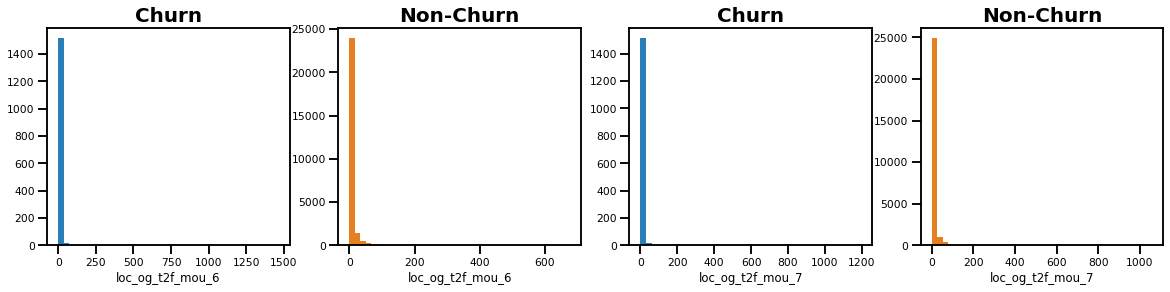

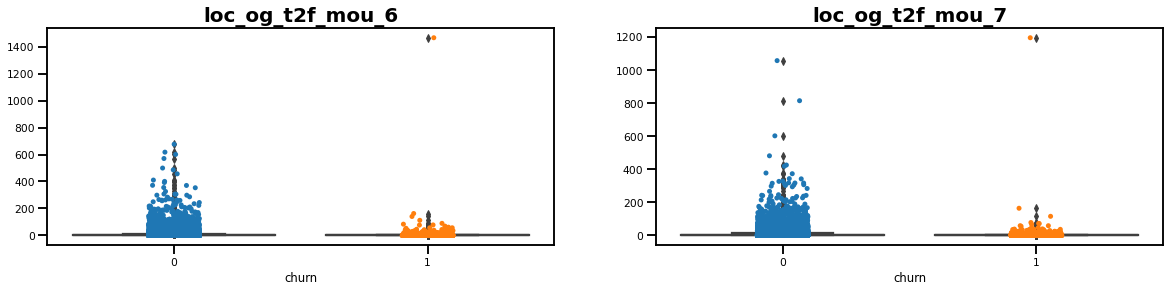

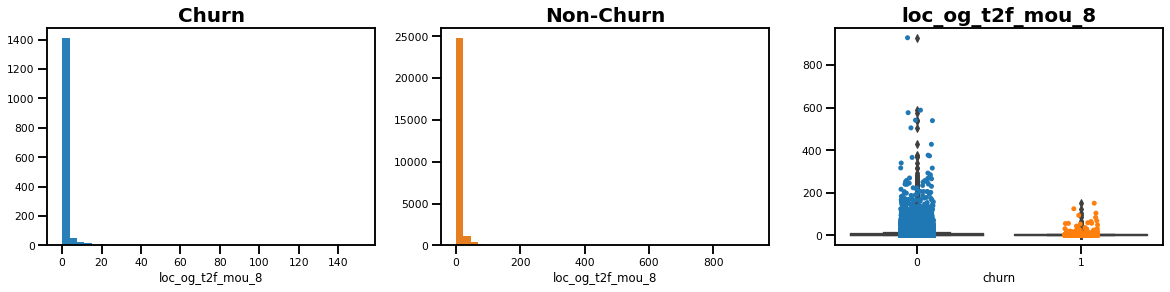

In [37]:
dist_box_plot(telecom,'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8')

### std_og_t2t_mou  (Minutes of usage within same operator on STD outgoing calls)

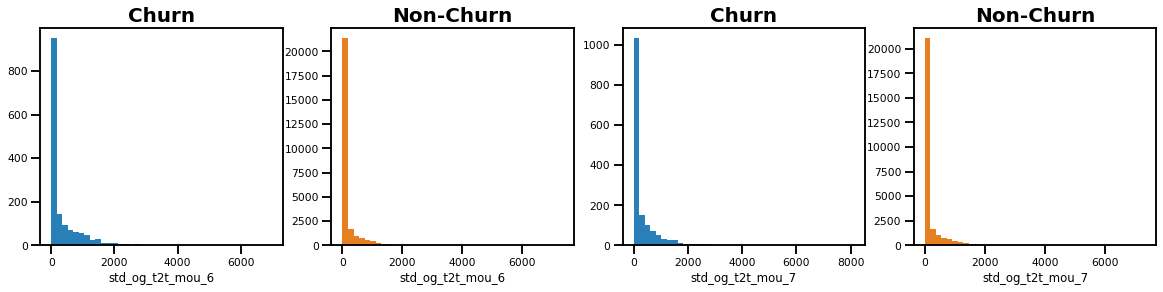

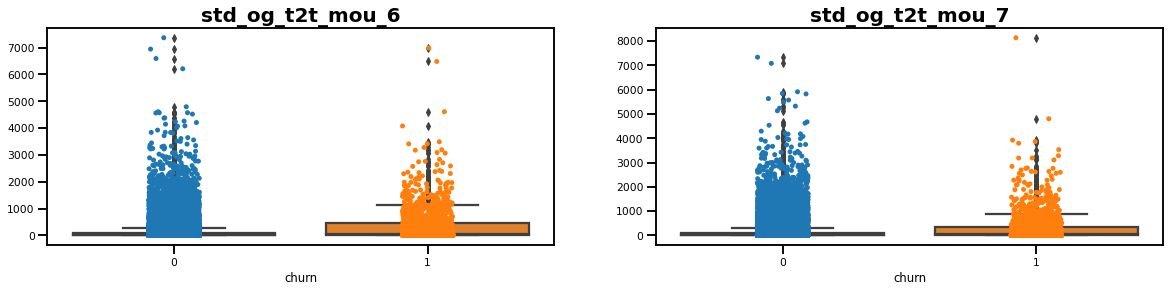

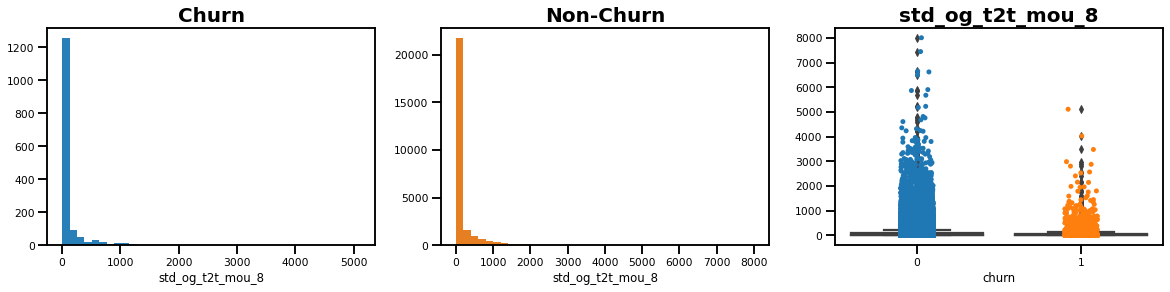

In [38]:
dist_box_plot(telecom,'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8')

### isd_og_mou  (Minutes of usage  on ISD outgoing calls)

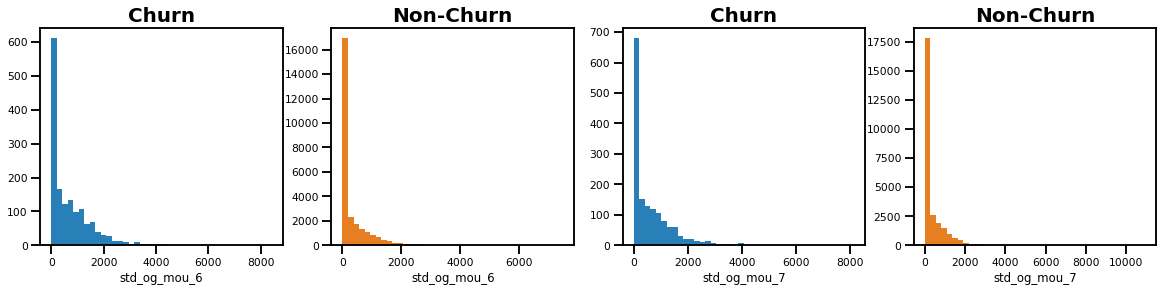

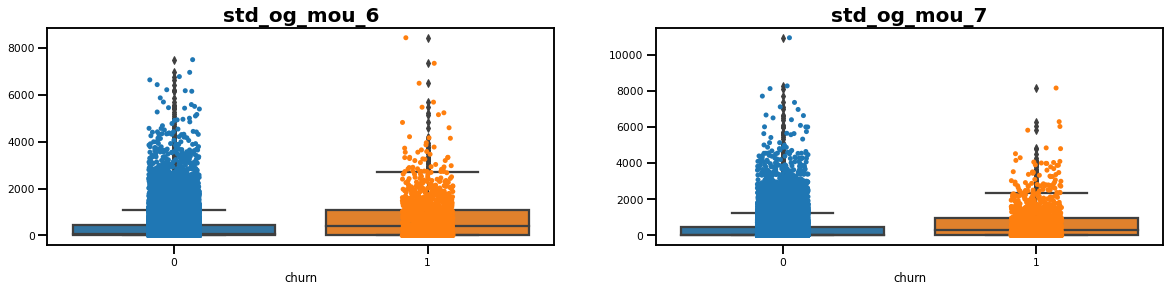

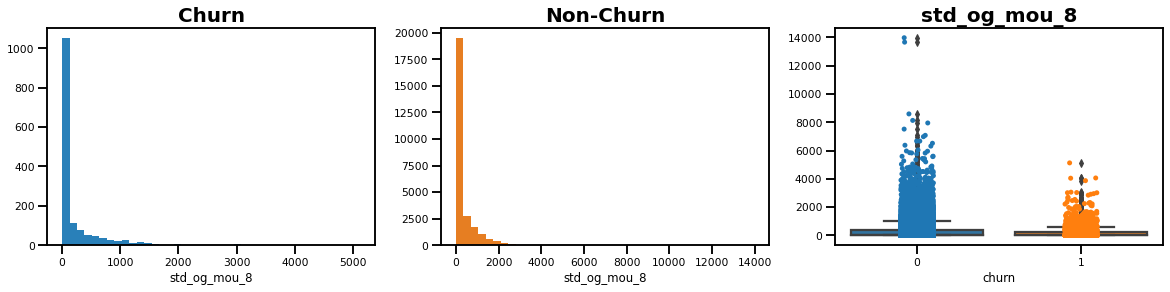

In [39]:
dist_box_plot(telecom,'std_og_mou_6','std_og_mou_7','std_og_mou_8')

### spl_og_mou  (Minutes of usage  on Special calls)

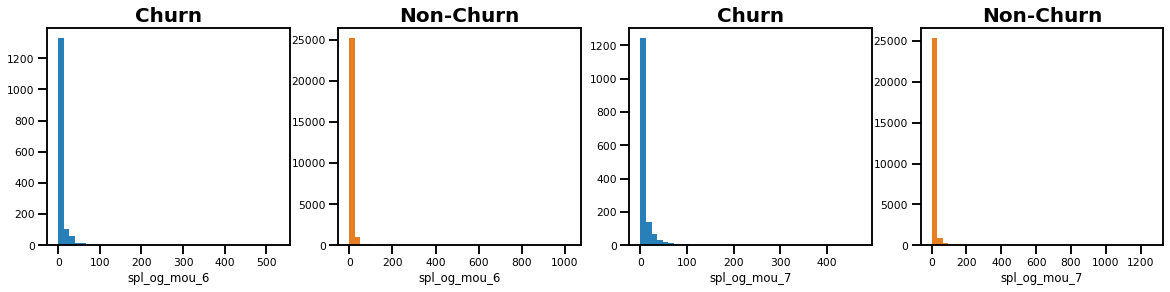

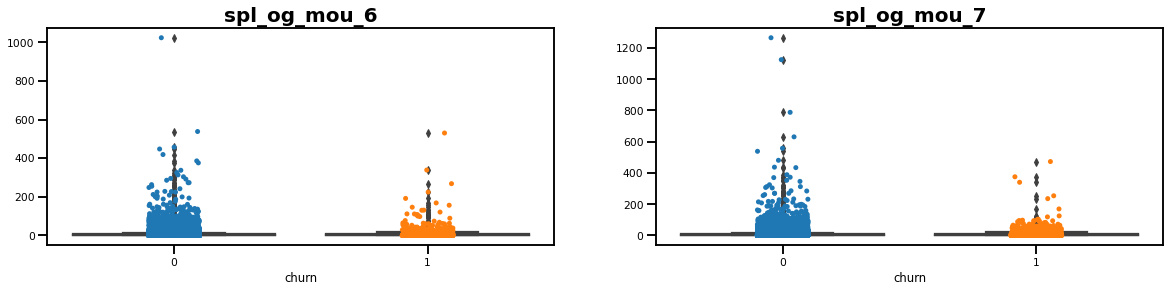

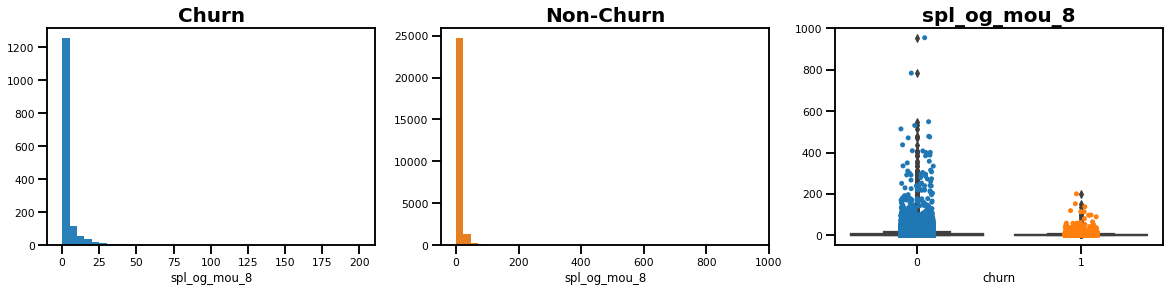

In [40]:
dist_box_plot(telecom,'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8')

### loc_ic_t2t_mou  (Minutes of usage within same operator on local incoming calls)

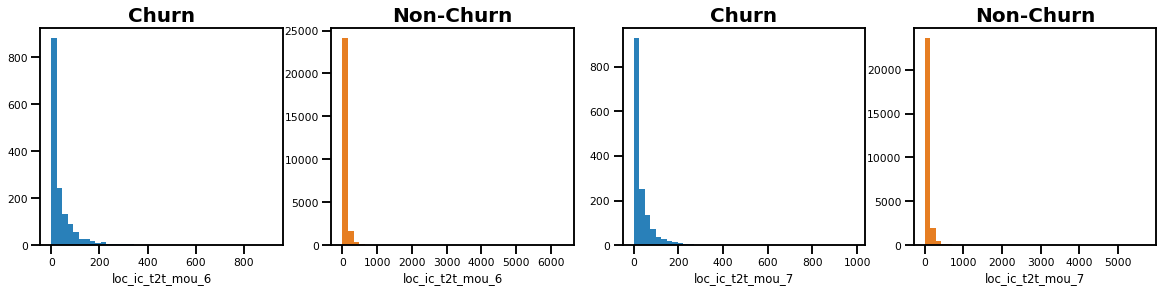

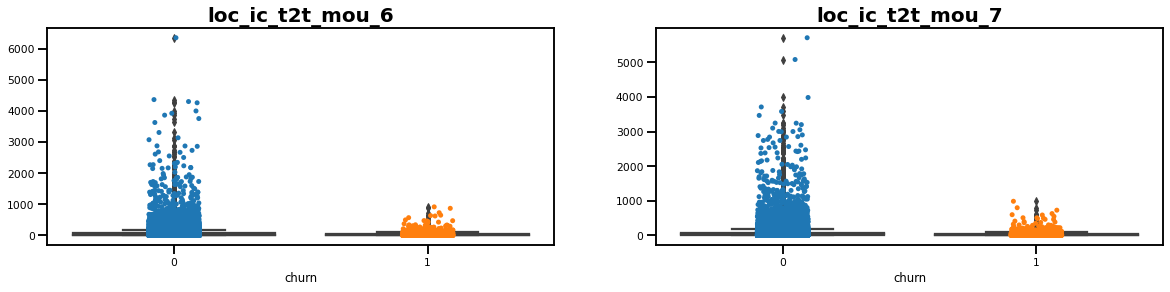

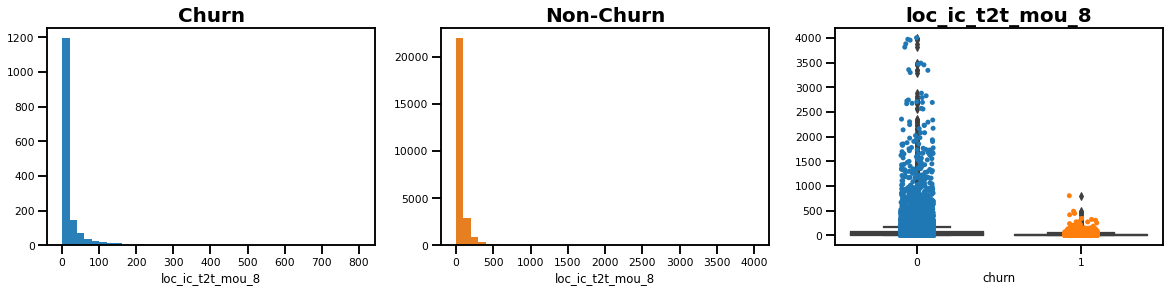

In [41]:
dist_box_plot(telecom,'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8')

### loc_ic_t2f_mou  (Minutes of usage from Operator T to fixed lines of T on local incoming calls)

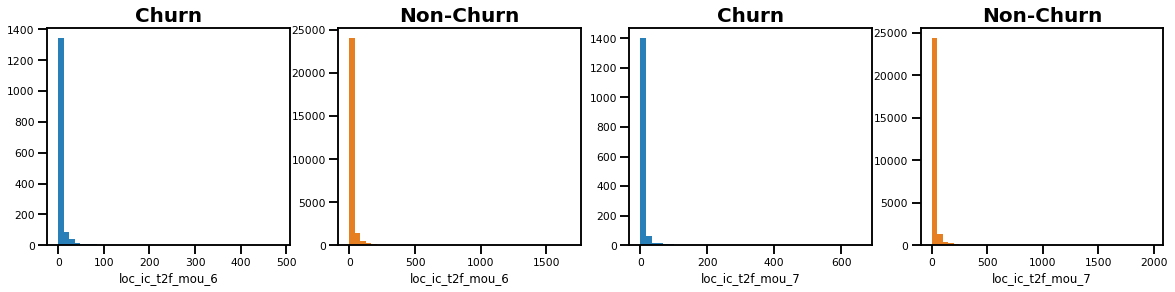

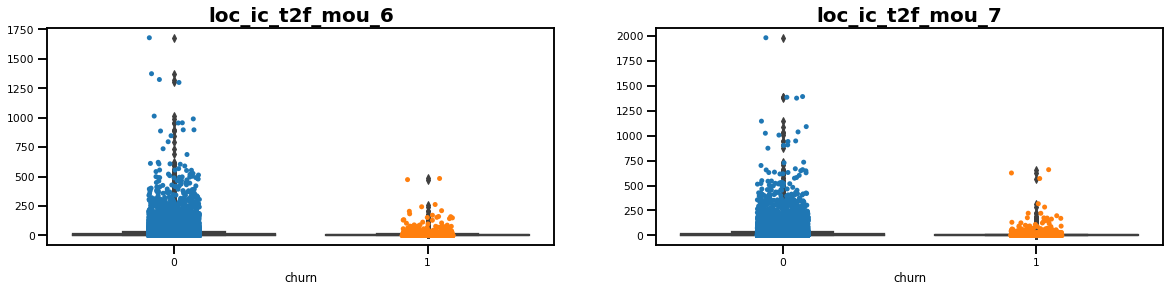

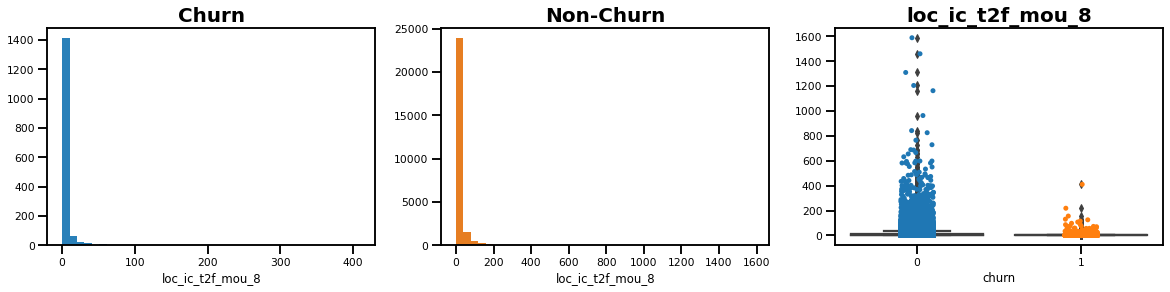

In [42]:
dist_box_plot(telecom,'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8')

### total_ic_mou  (Total Minutes of usage on incoming calls)

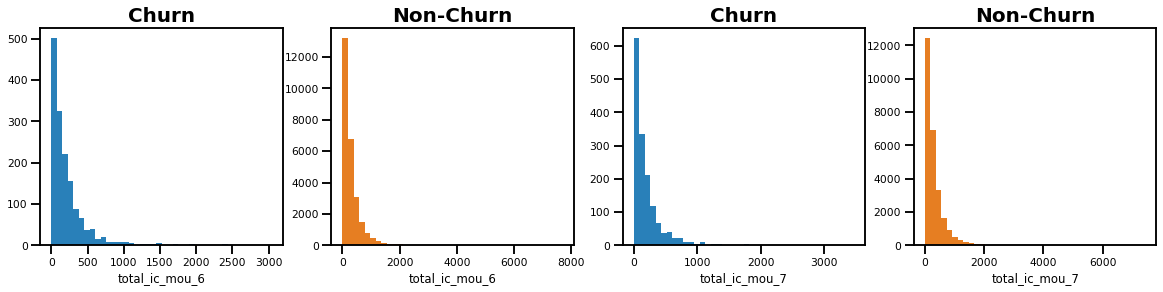

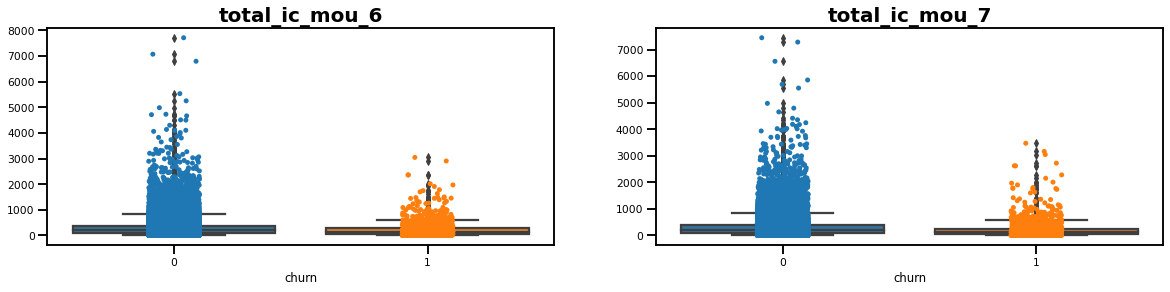

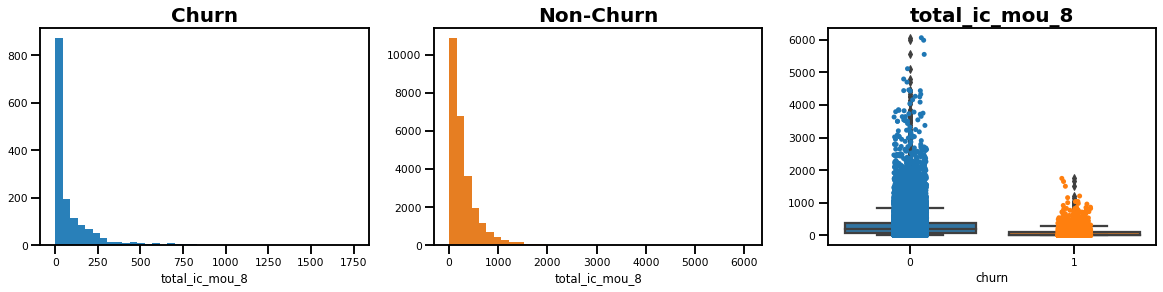

In [43]:
dist_box_plot(telecom,'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8')

### total_rech_amt (Total Reacharge Amount)

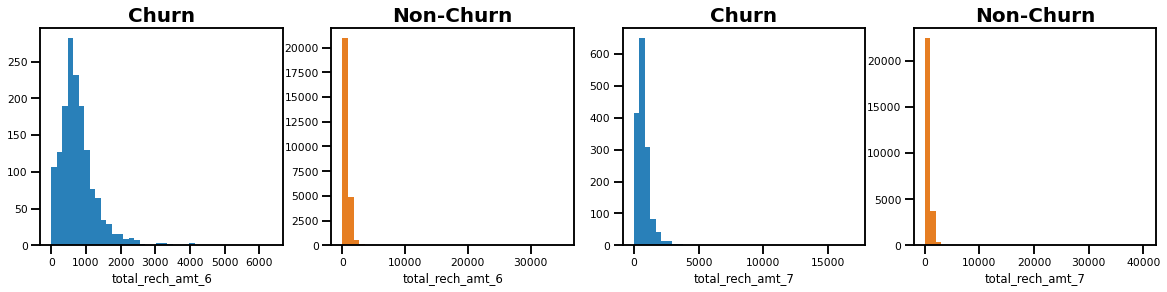

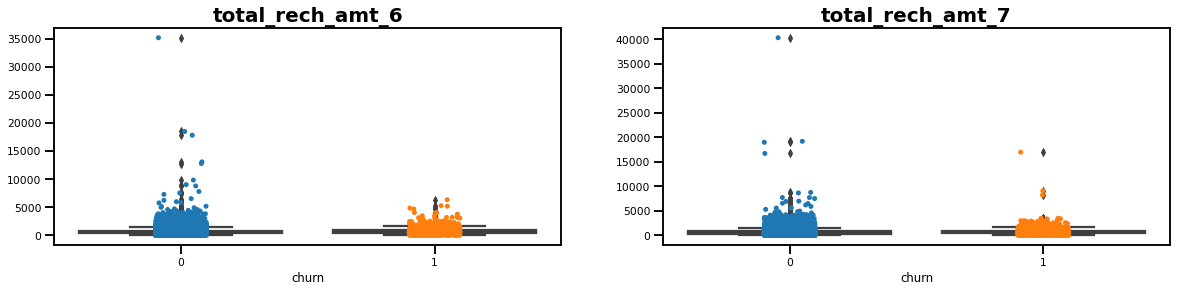

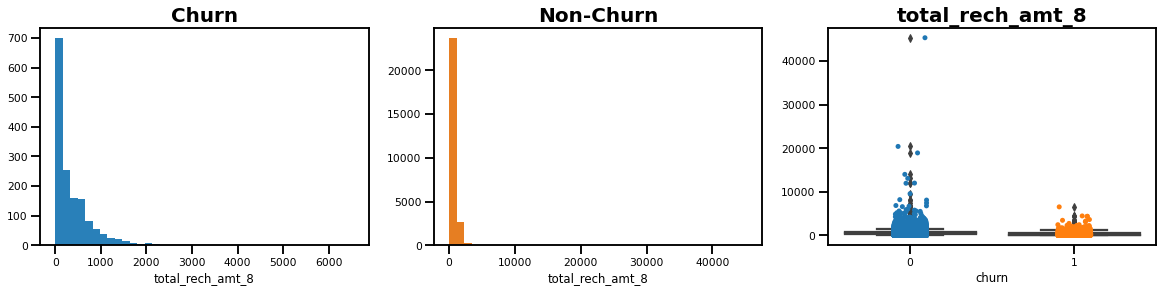

In [44]:
dist_box_plot(telecom,'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8')

In [45]:
### max_rech_amt (Max Reacharge Amount)

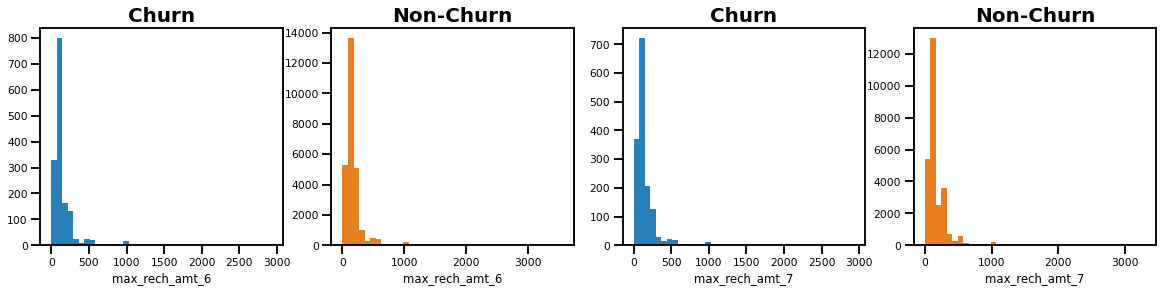

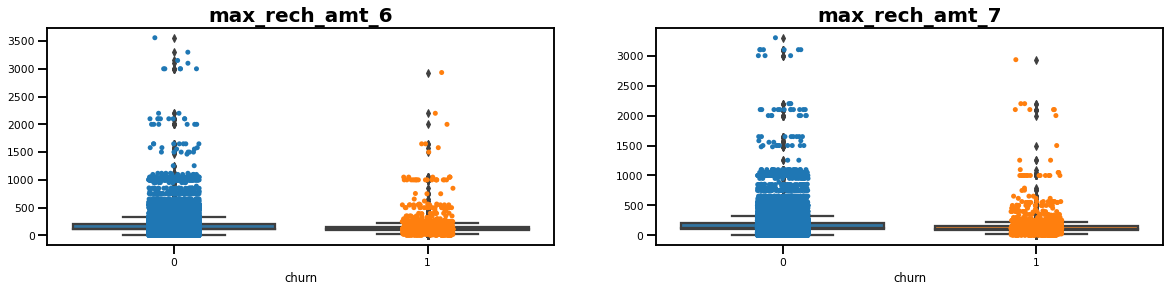

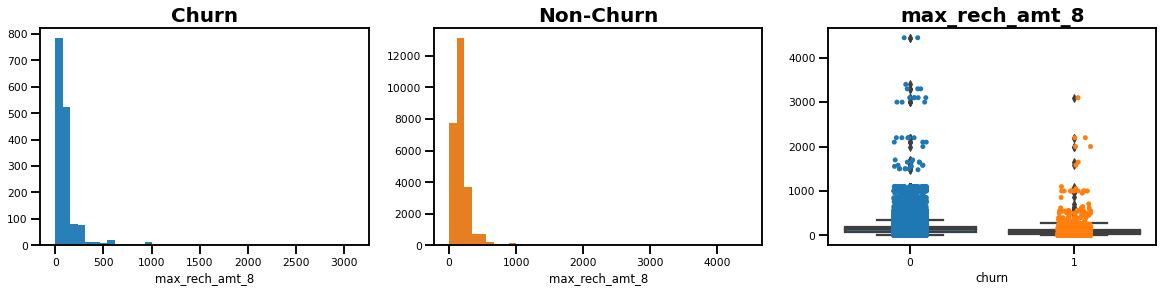

In [46]:
dist_box_plot(telecom,'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')

### last_day_rch_amt (Last day Reacharge Amount)

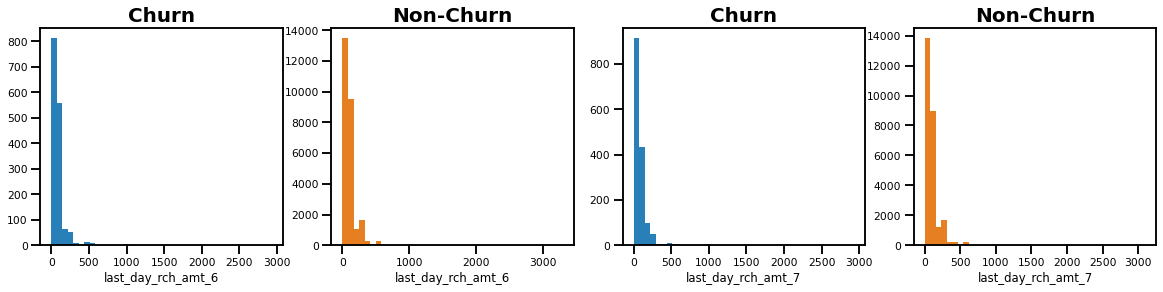

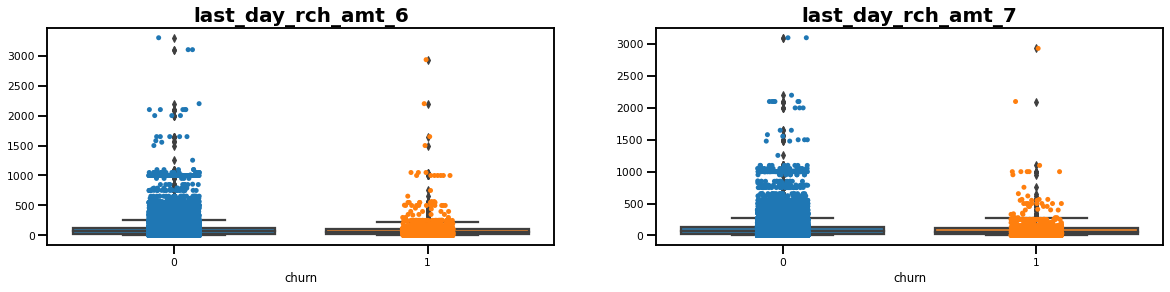

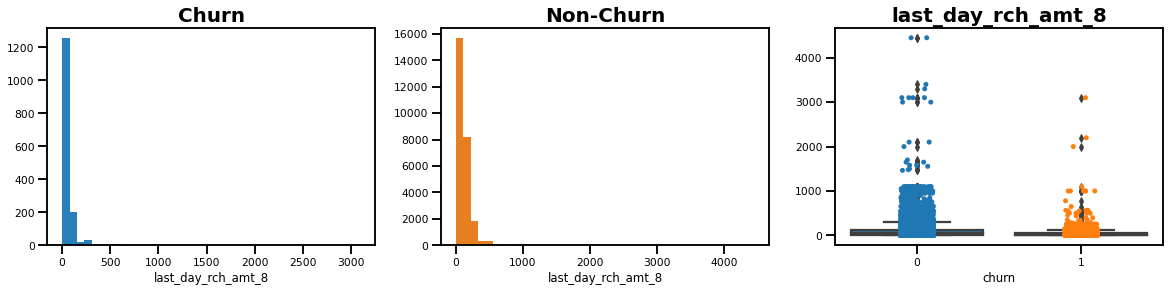

In [47]:
dist_box_plot(telecom,'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8')

### max_rech_data (Max Reachrge Data)

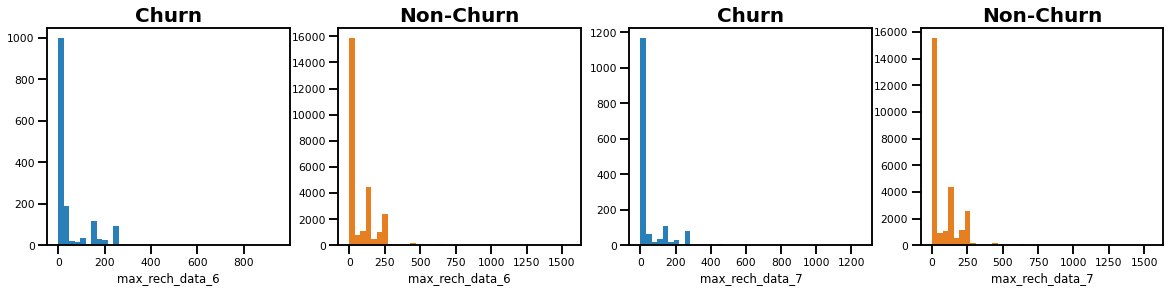

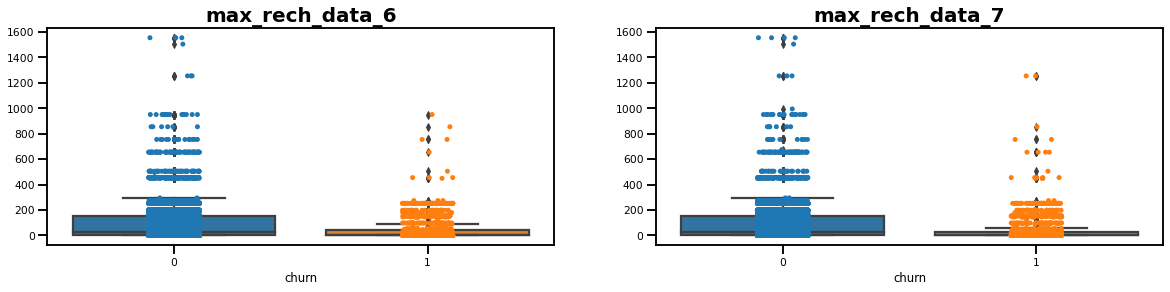

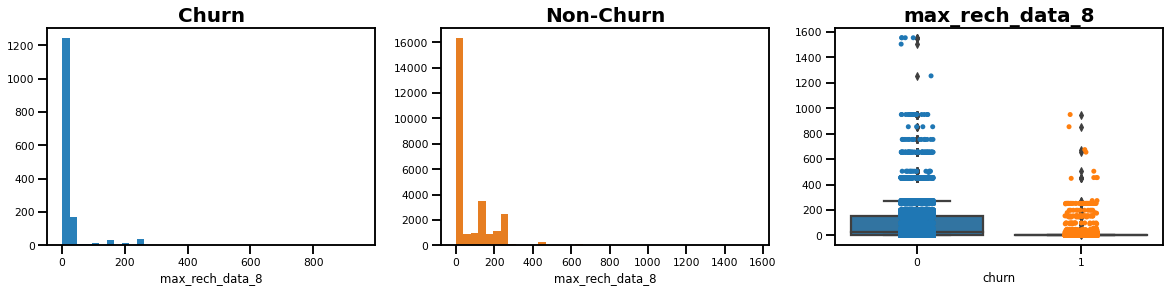

In [48]:
dist_box_plot(telecom,'max_rech_data_6','max_rech_data_7','max_rech_data_8')

### av_rech_amt_data (Average recharge amount data)

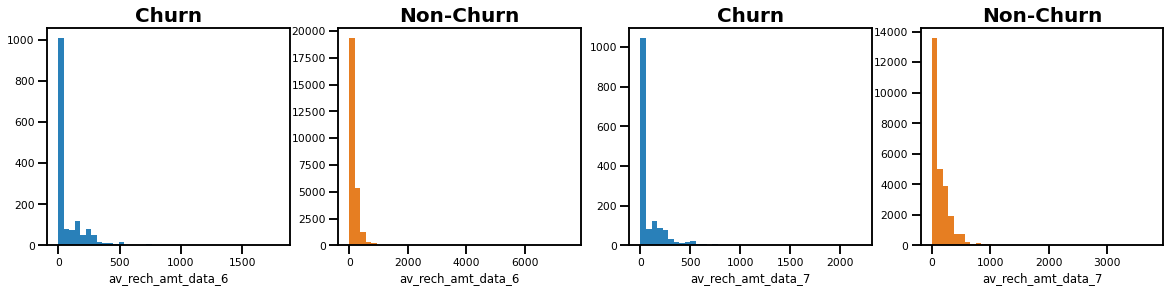

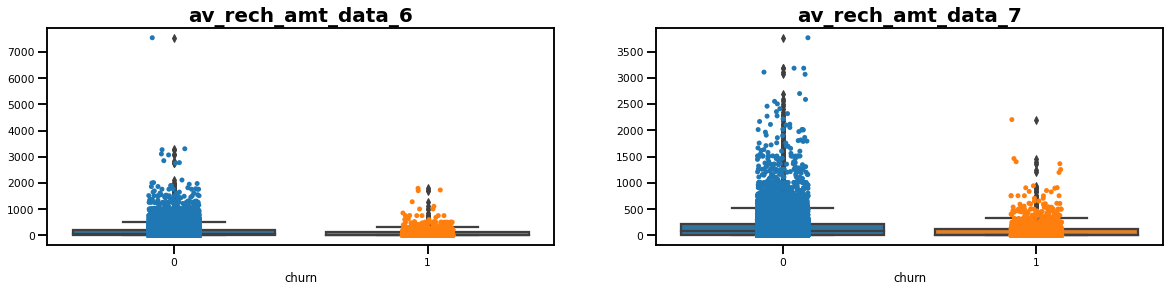

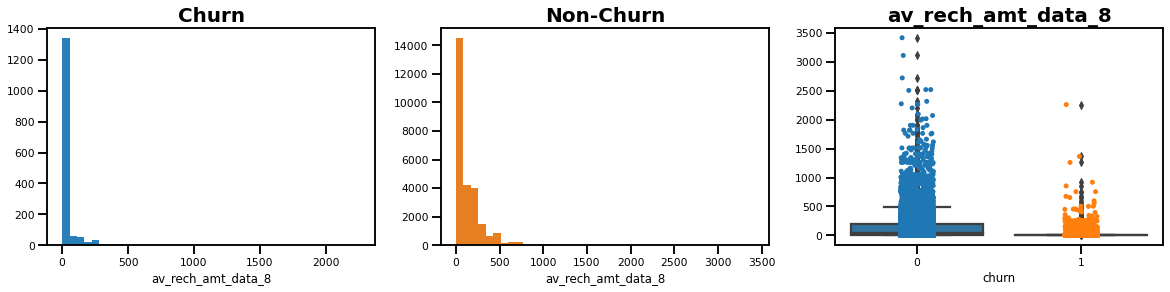

In [49]:
dist_box_plot(telecom,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8')

### vol_2g_mb (2g data volume in Mb)

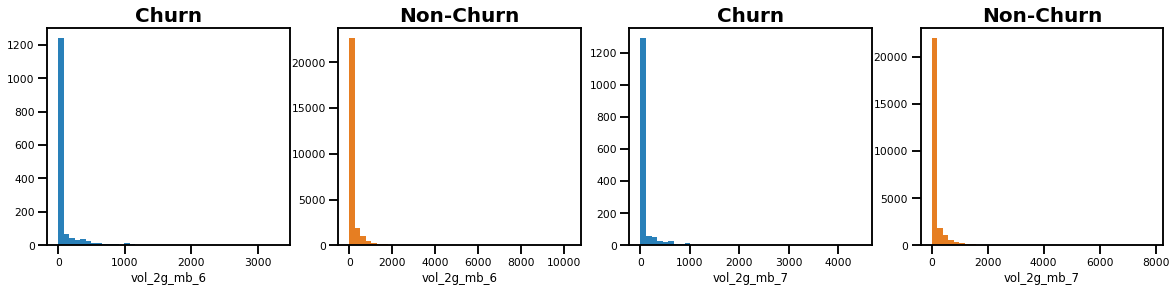

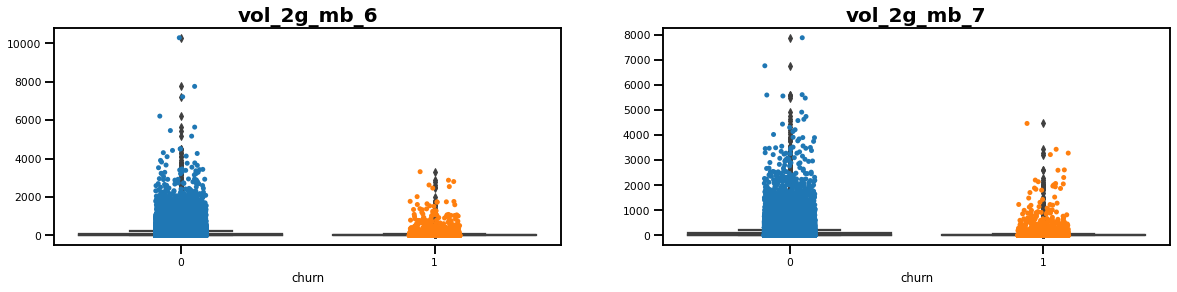

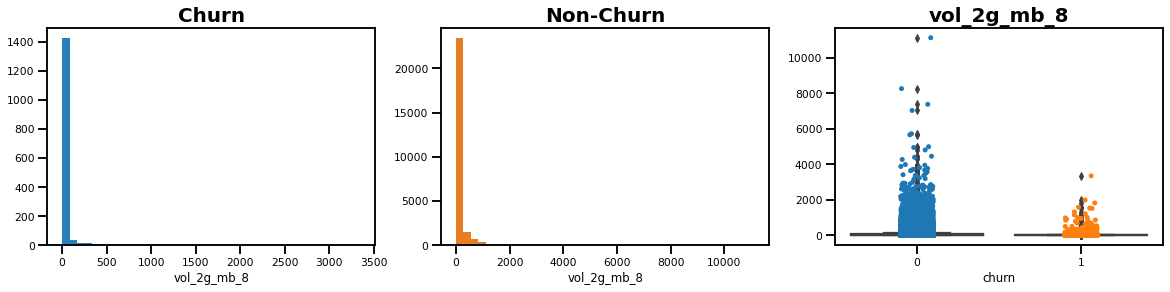

In [50]:
dist_box_plot(telecom,'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8')

### vol_3g_mb (3g data volume in Mb)

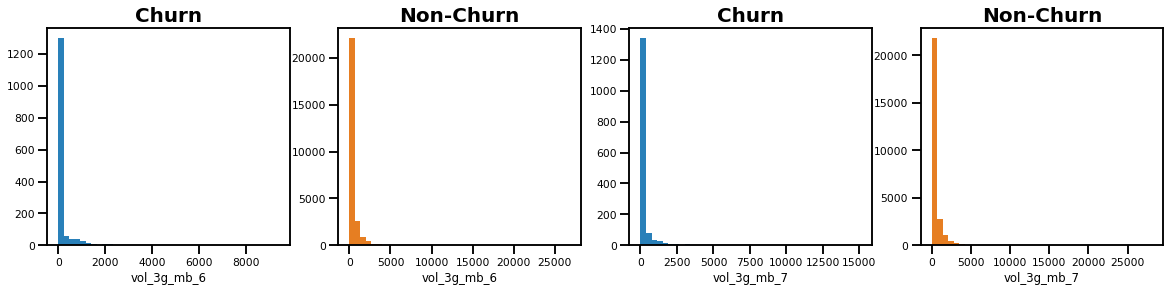

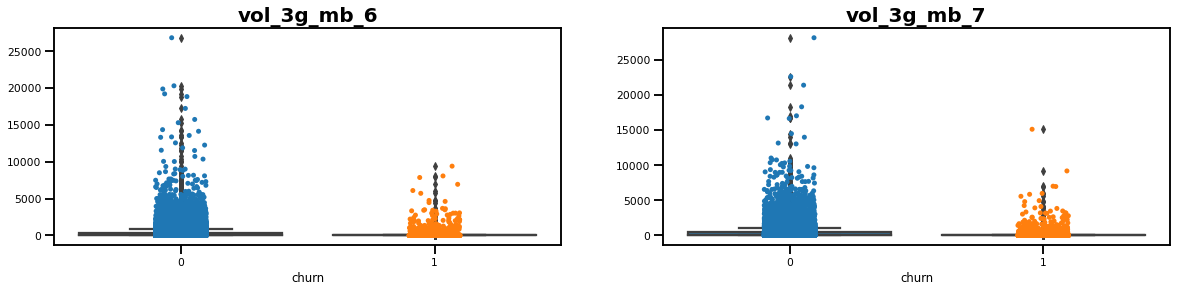

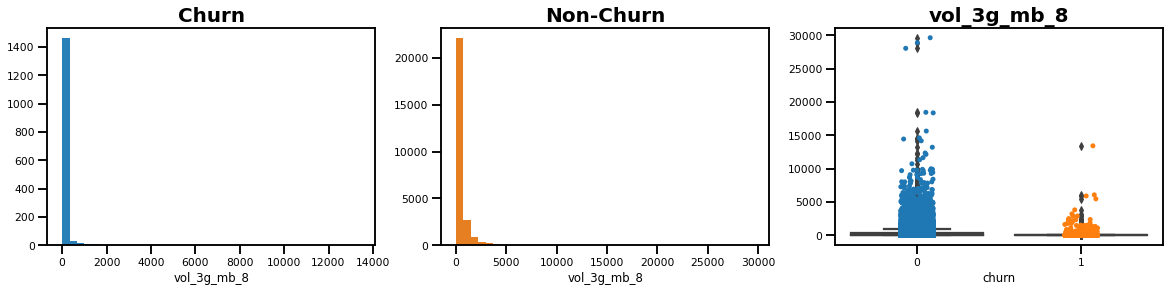

In [51]:
dist_box_plot(telecom,'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8')

### arpu_3g (Avg Revenue per user from 3g data)

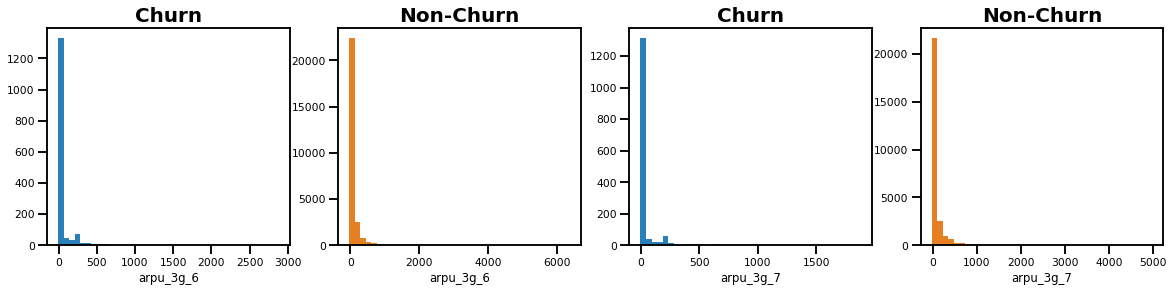

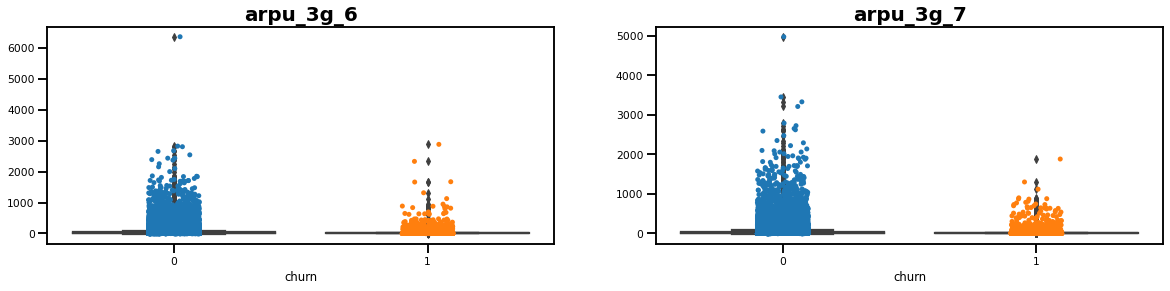

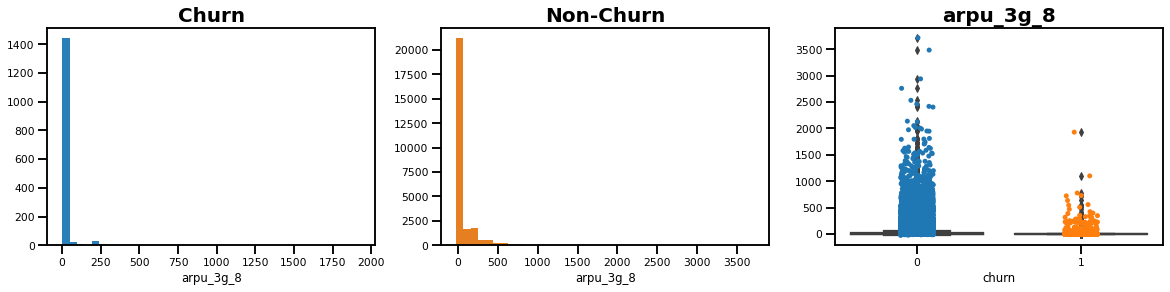

In [52]:
dist_box_plot(telecom,'arpu_3g_6','arpu_3g_7','arpu_3g_8')

### arpu_2g (Avg Revenue per user from 2g data)

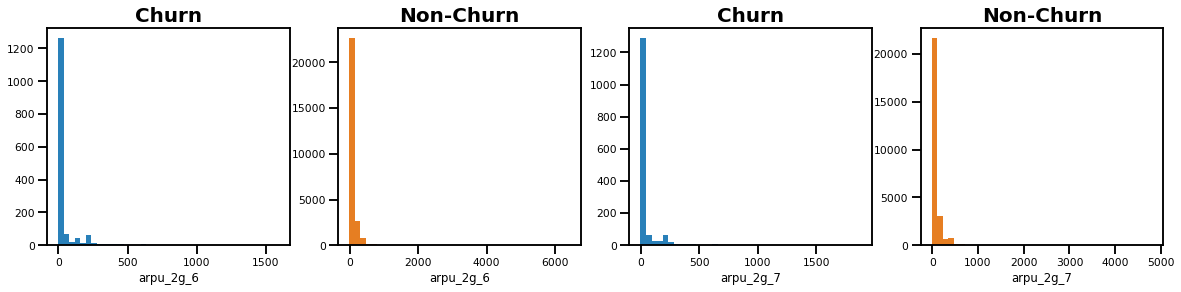

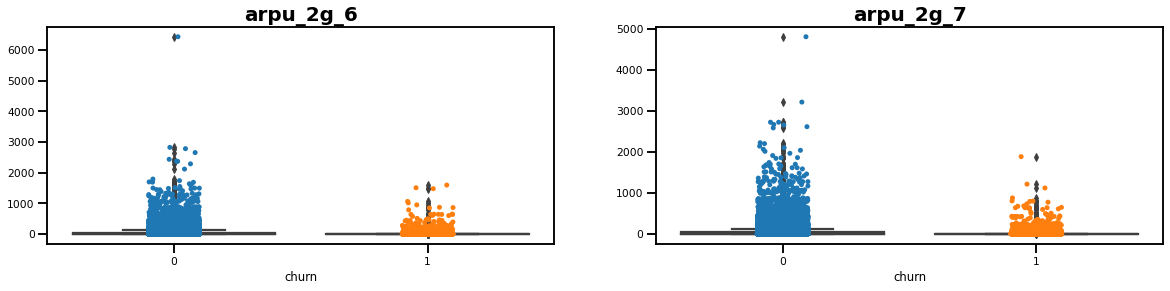

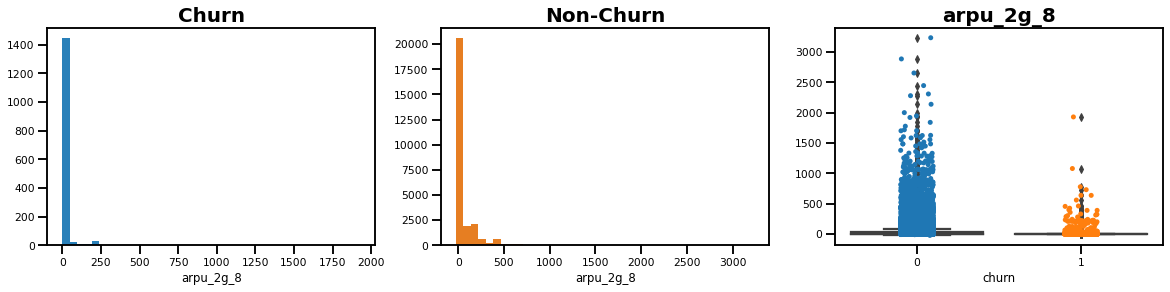

In [53]:
dist_box_plot(telecom,'arpu_2g_6','arpu_2g_7','arpu_2g_8')

### month_vbc (Volume based cost - when no specific scheme is not purchased and paid as per usage)

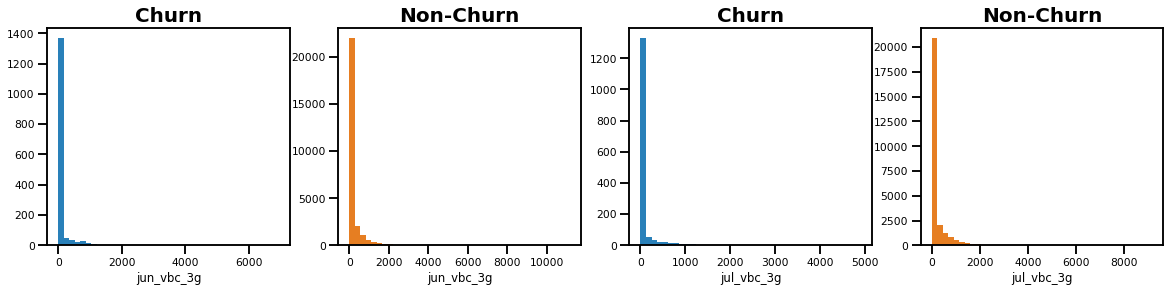

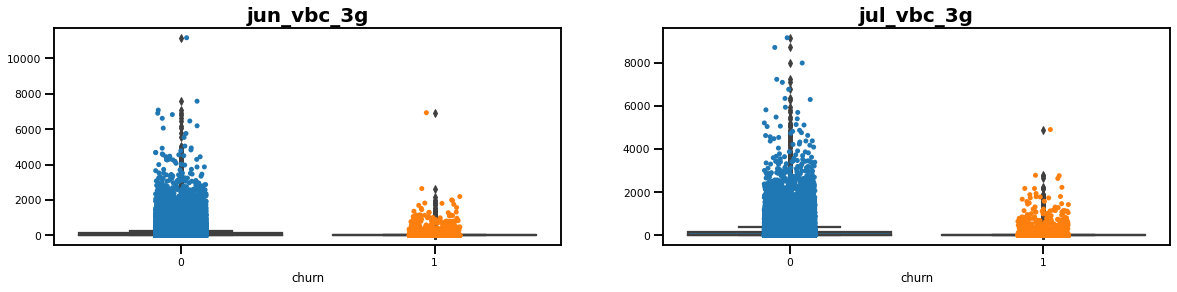

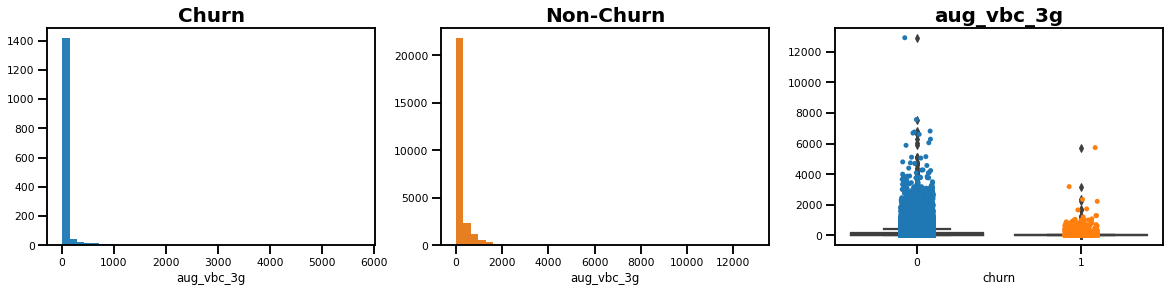

In [54]:
dist_box_plot(telecom,'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g')

### tot_amt (Total amount)

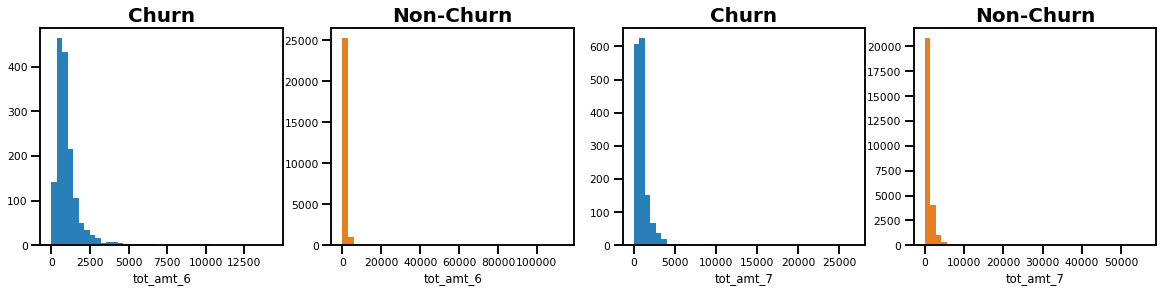

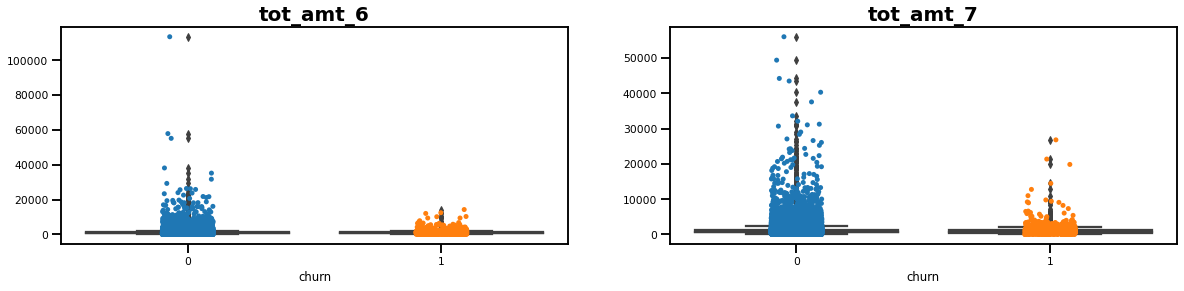

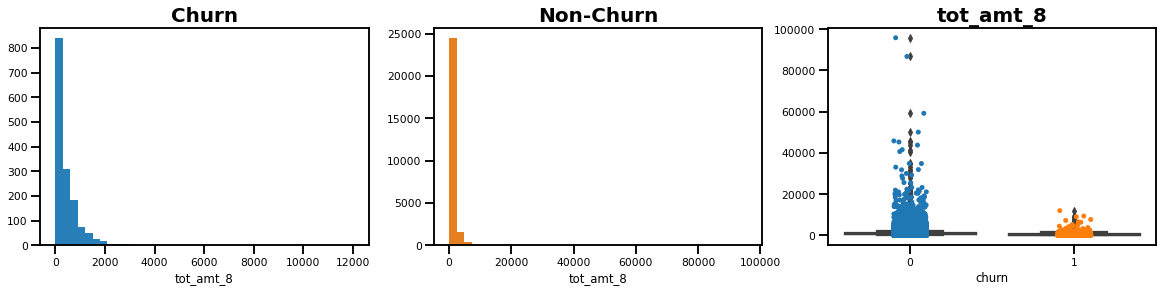

In [55]:
dist_box_plot(telecom,'tot_amt_6','tot_amt_7','tot_amt_8')

### total_rech_num (Total no of recharges)

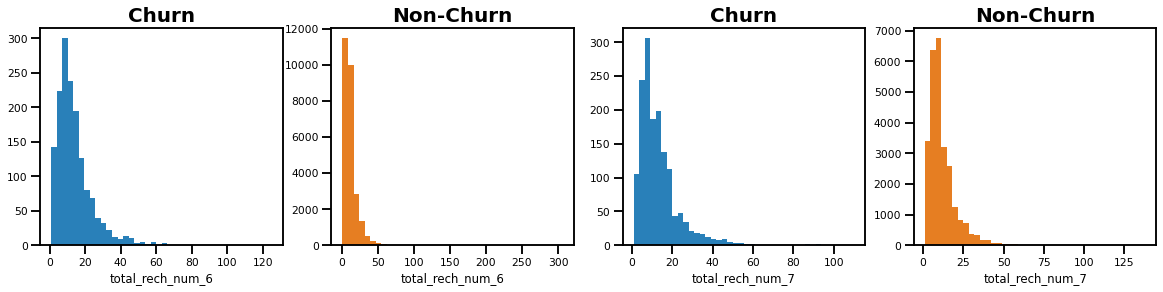

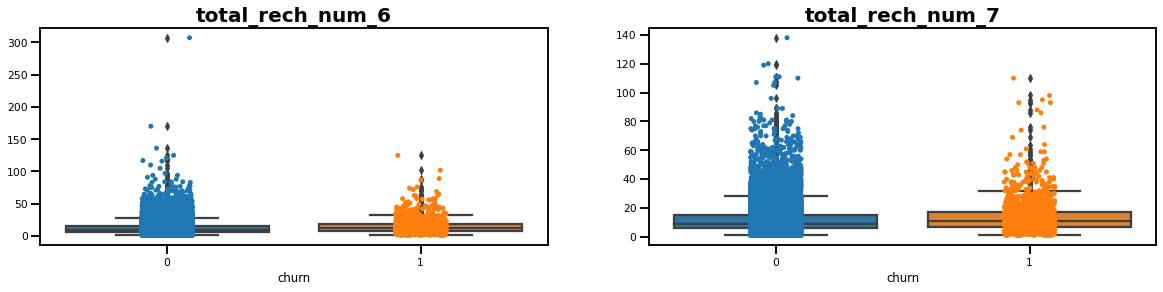

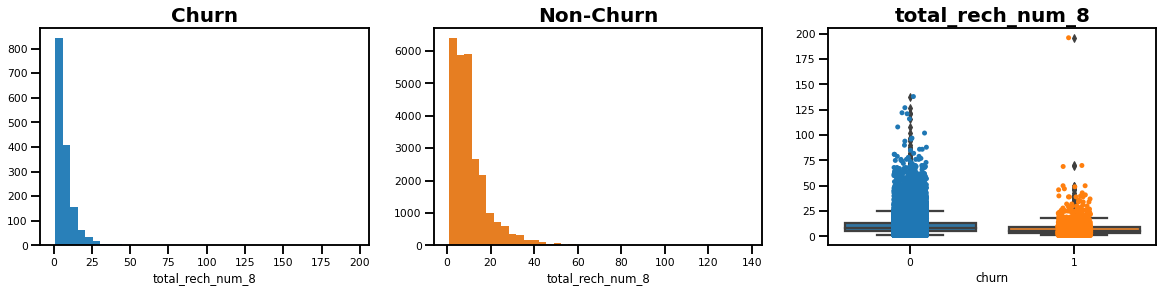

In [56]:
dist_box_plot(telecom,'total_rech_num_6','total_rech_num_7','total_rech_num_8')

### aon(Age on network - number of days the customer is using the operator T network)

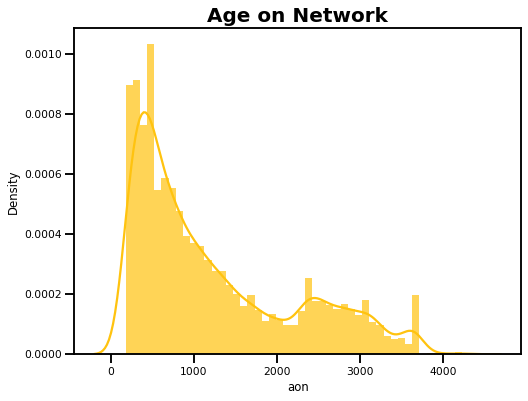

In [57]:
plt.figure(figsize=(8,6))
ax=sns.distplot(telecom['aon'],color='#FFC30F',hist_kws={"alpha": 0.7})
ax.set_title('Age on Network',fontweight='bold',size=20)
plt.show()

## Categorical columns

### Night pack user

<Figure size 720x432 with 0 Axes>

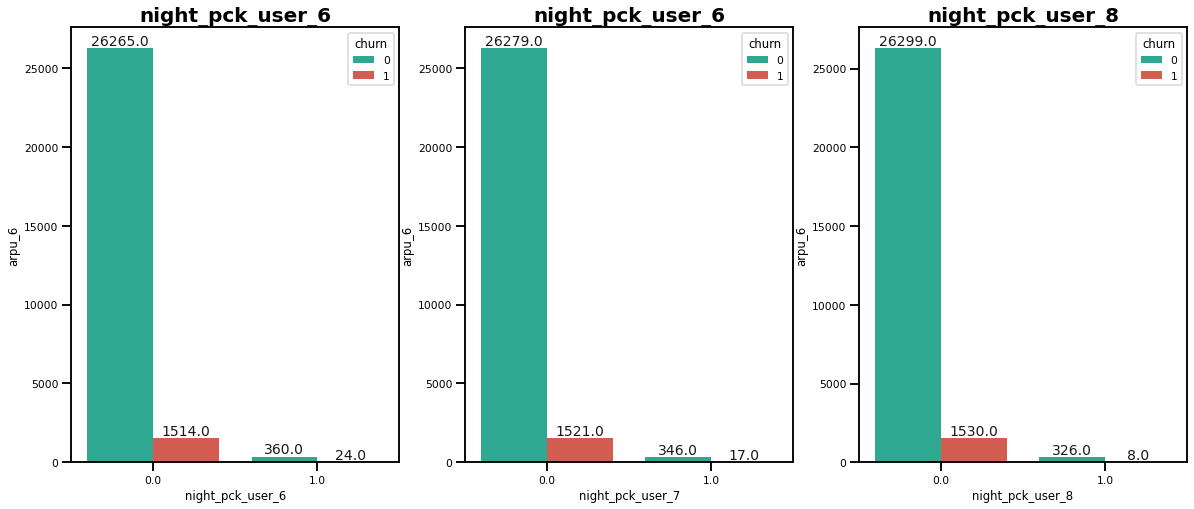

In [58]:
plt.figure(figsize=(10,6))
color=['#1ABC9C','#E74C3C']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('night_pck_user_8',fontweight='bold',size=20)
plt.show()

### Fb User

<Figure size 720x432 with 0 Axes>

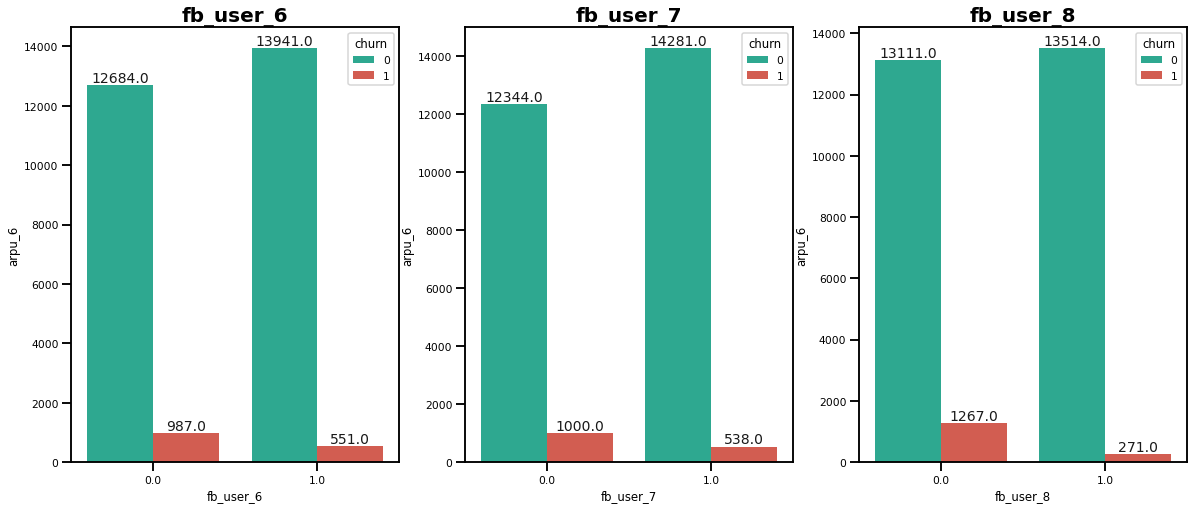

In [59]:
plt.figure(figsize=(10,6))
color=['#1ABC9C','#E74C3C']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
df_temp= pd.DataFrame(telecom.groupby(['fb_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('fb_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['fb_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('fb_user_7',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['fb_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('fb_user_8',fontweight='bold',size=20)
plt.show()

In [60]:
# Function to plot columns related to minutes of usage with month
def plot_Churn_Mou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=telecom.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [61]:
# Function to plot columns related to minutes of usage with month
def plot_Churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(telecom.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

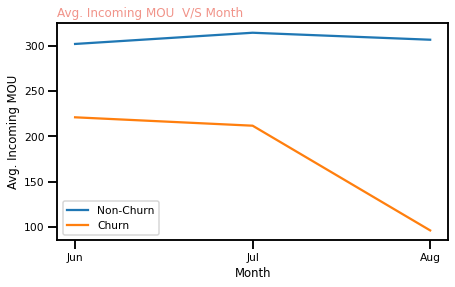

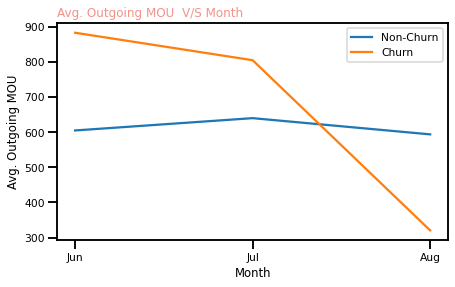

In [62]:
ic_mou = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_mou = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_Churn_Mou(ic_mou,'Incoming')
plot_Churn_Mou(og_mou,'Outgoing')

# Data Preparation

## Feature Engineering

`Creating derived features: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 These features will hold the ratio (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and should be a better predictor of churn.`

In [63]:
# Creating new features which are ratio of total outgoing call with total incoming calls minutes of usage.
for i in range(6,9):
    telecom['tot_og_to_ic_mou_'+str(i)] = (telecom['total_og_mou_'+str(i)])/(telecom['total_ic_mou_'+str(i)]+1)

`Creating derived features: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8 These features will hold the ratio (=loc_ogmou / loc_icmou) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [64]:
# Creating new features which are ratio of local outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['loc_og_to_ic_mou_'+str(i)] = (telecom['loc_og_mou_'+str(i)])/(telecom['loc_ic_mou_'+str(i)]+1)

`Creating derived features: roam_og_to_ic_mou_6, roam_og_to_ic_mou_7, roam_og_to_ic_mou_8 These features will hold the ratio (=roam_og_mou / roam_ic_mou) for each month. These features will combine the roaming calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [65]:
# Creating new features which are ratio of roaming outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['roam_og_to_ic_mou_'+str(i)] = (telecom['roam_og_mou_'+str(i)])/(telecom['roam_ic_mou_'+str(i)]+1)

`Creating derived features: spl_og_to_ic_mou_6, spl_og_to_ic_mou_7, spl_og_to_ic_mou_8 These features will hold the ratio (=spl_og_mou / spl_ic_mou) for each month. These features will combine the Special calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [66]:
# Creating new features which are ratio of Special outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['spl_og_to_ic_mou_'+str(i)] = (telecom['spl_og_mou_'+str(i)])/(telecom['spl_ic_mou_'+str(i)]+1)

`Creating derived features: std_og_to_ic_mou_6, std_og_to_ic_mou_7, std_og_to_ic_mou_8 These features will hold the ratio (=std_og_mou / std_ic_mou) for each month. These features will combine the std calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [67]:
# Creating new features which are ratio of std outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['std_og_to_ic_mou_'+str(i)] = (telecom['std_og_mou_'+str(i)])/(telecom['std_ic_mou_'+str(i)]+1)

`Creating derived features: isd_og_to_ic_mou_6, isd_og_to_ic_mou_7, isd_og_to_ic_mou_8 These features will hold the ratio (=isd_og_mou / isd_ic_mou) for each month. These features will combine the isd calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [68]:
# Creating new features which are ratio of isd outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['isd_og_to_ic_mou_'+str(i)] = (telecom['isd_og_mou_'+str(i)])/(telecom['isd_ic_mou_'+str(i)]+1)

### tot_og_to_ic_mou( Total outgoing mou to incoming mou)

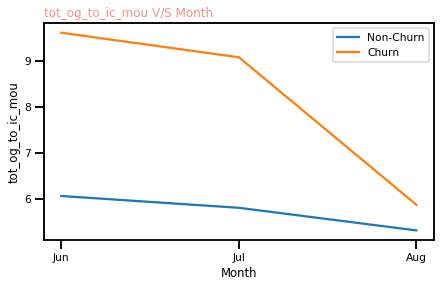

In [69]:
plot_Churn(telecom,'tot_og_to_ic_mou')

### loc_og_to_ic_mou( Local outgoing mou to incoming mou)

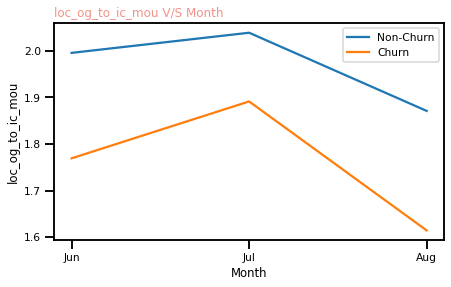

In [70]:
plot_Churn(telecom,'loc_og_to_ic_mou')

### std_og_to_ic_mou( Std outgoing mou to incoming mou)

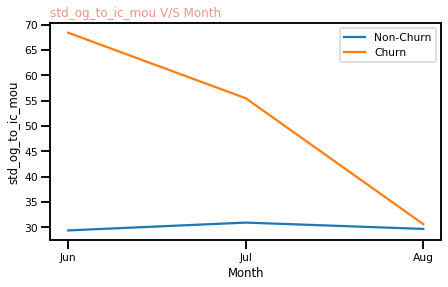

In [71]:
plot_Churn(telecom,'std_og_to_ic_mou')

### total_amount (Total amount)

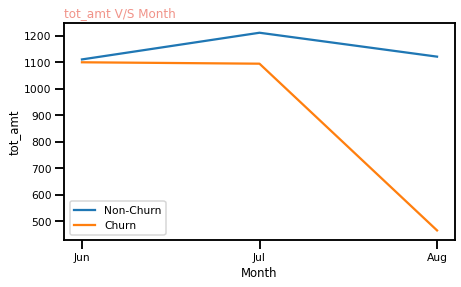

In [72]:
plot_Churn(telecom,'tot_amt')

`Creating derived features: total_vol_data - Combining vol_2g_mb and vol_3g_mb. These features will combine the 2g data usage and 3g data usage and should be a better predictor of churn.`

In [73]:
# Creating new features combining 2g and 3g
for i in range(6,9):
    telecom['total_vol_'+str(i)] = (telecom['vol_2g_mb_'+str(i)])+(telecom['vol_3g_mb_'+str(i)])

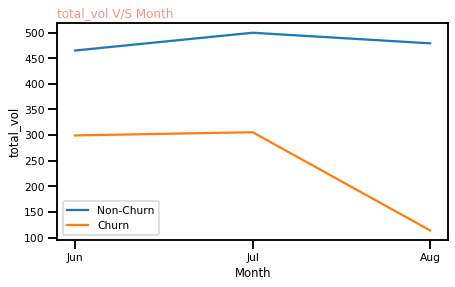

In [74]:
plot_Churn(telecom,'total_vol')

`Creating derived features: total_arpu - Combining arpu_2g and arpu_3g. These features will combine the average revenue per user from 2g and 3g data and should be a better predictor of churn.`

In [75]:
# Creating new features combining average revenue per user from 2g and 3g
for i in range(6,9):
    telecom['total_arpu_'+str(i)] = (telecom['arpu_3g_'+str(i)])+(telecom['arpu_3g_'+str(i)])

In [76]:
date_cols=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_6','date_of_last_rech_7',\
         'date_of_last_rech_8']
for col in date_cols:
    telecom[col] = pd.to_datetime(telecom[col],format='%m/%d/%Y',errors='coerce')

In [77]:
telecom['date_of_last_rech_dow_6'] = telecom['date_of_last_rech_6'].dt.dayofweek.astype(str)
telecom['date_of_last_rech_dow_7'] = telecom['date_of_last_rech_7'].dt.dayofweek.astype(str)
telecom['date_of_last_rech_dow_8'] = telecom['date_of_last_rech_8'].dt.dayofweek.astype(str)
telecom['date_of_last_rech_data_dow_6'] = telecom['date_of_last_rech_data_6'].dt.dayofweek.fillna(7).astype(int).astype(str)
telecom['date_of_last_rech_data_dow_7'] = telecom['date_of_last_rech_data_7'].dt.dayofweek.fillna(7).astype(int).astype(str)
telecom['date_of_last_rech_data_dow_8'] = telecom['date_of_last_rech_data_8'].dt.dayofweek.fillna(7).astype(int).astype(str)

In [78]:
# recent recharge date 
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
telecom['last_rech_date'] = telecom[cols].max(axis=1)
# number of days from  the recent charge date till last date of Aug/8th month
telecom['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31',\
                                                         format='%Y-%m-%d') - telecom['last_rech_date'] ).astype('timedelta64[D]'))
# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3,  means present in all columns, 0 means not present in any column
telecom['rech_weightage'] = len(cols) - (telecom[cols].isnull().sum(axis=1))
telecom.drop(['last_rech_date','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

# recent recharge date 
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
telecom['last_rech_data_date'] = telecom[cols].max(axis=1)
# number of days from  the recent charge date till last date of Aug/8th month
telecom['days_since_last_data_rech'] = np.floor(( pd.to_datetime('2014-08-31',\
                                                         format='%Y-%m-%d') - telecom['last_rech_data_date'] ).astype('timedelta64[D]'))
telecom['days_since_last_data_rech'] = telecom['days_since_last_data_rech'].fillna(0)
# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3,  means present in all columns, 0 means not present in any column
telecom['rech_data_weightage'] = len(cols) - (telecom[cols].isnull().sum(axis=1))
telecom.drop(['last_rech_data_date','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

In [79]:
catg =['night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6',\
       'night_pck_user_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','fb_user_7',\
       'night_pck_user_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','fb_user_8','date_of_last_rech_dow_6',\
      'date_of_last_rech_dow_7','date_of_last_rech_dow_8','date_of_last_rech_data_dow_6','date_of_last_rech_data_dow_7',\
      'date_of_last_rech_data_dow_8']
num_col = list(set(telecom.columns).difference(set(catg)))

#### Creating new features which will be average  of all columns for 6th, 7th 

In [80]:
#filtering columns name by removing only last charcter of column name
col_list = telecom.select_dtypes(include=['float64',\
                                          'int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['avg_amt_6_7','og_others_6'],axis=1).columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    col_name = 'avg_'+col # lets create the column name dynamically
    col6 = col+'_6'
    col7 = col+'_7'
    telecom[col_name] = round((telecom[col6]  + telecom[col7])/ 2,2)

In [81]:
#Dropping those columns since we already created features from it(dropping because of multicollinearity)
col_list = telecom.select_dtypes(include=['float64',\
                'int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['avg_amt_6_7','og_others_6'],axis=1).columns
telecom.drop(col_list,axis=1,inplace=True)
num_col = list(set(telecom.columns).difference(set(catg)))

#### Creating dummy variables for categorical variables

In [82]:
dummy_df=pd.get_dummies(telecom[catg],drop_first=True)
telecom=pd.concat([telecom,dummy_df],axis=1)
telecom= telecom.drop(catg,axis=1)

##  Handling Skewness

In [83]:
# Lets find out if numerical predictor variables are largely skewed or not
telecom_numerical=telecom[num_col]
skew_features = telecom_numerical.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
pd.DataFrame(skew_features,columns=['Skewness']).head(10)

,Skewness
roam_og_to_ic_mou_8,163.292632
avg_isd_og_to_ic_mou,151.271554
isd_og_to_ic_mou_8,149.189910
og_others_6,108.400428
avg_roam_og_to_ic_mou,106.282573
avg_isd_og_mou,90.006615
isd_og_mou_8,88.134632
loc_og_to_ic_mou_8,66.210311
avg_spl_ic_mou,57.492190
avg_loc_og_to_ic_mou,55.595631


`As we can see from skewness values, predictor variables are highly skewed. We need to take care of skewness.`

In [84]:
#Removing Skewness
num_col.remove('churn')
qntle_trnsfrm=QuantileTransformer()
telecom[num_col]= qntle_trnsfrm.fit_transform(telecom[num_col])

## Handling Imbalance Dataset

`There are many techniques available. I am using ADASYN(Adaptive Synthetic) which is an improved version of SMOTE.
What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.`

In [85]:
X=telecom.drop('churn',axis=1) #Independent/predictor variable
y=telecom['churn'] #output variables
randm_state= 42 # fixing random state to use same state wherever applicable

In [86]:
adasyn=ADASYN(random_state=randm_state,n_neighbors=5)
X,y= adasyn.fit_sample(X,y)


In [87]:
print('After applying ADASYN Oversmapling, Total No of Custumers are:',len(y))
print('After applying ADASYN Oversmapling, No of churn Custumers are:',y.sum())
print('After applying ADASYN Oversmapling, No of non-churn Custumers are:',len(y)- y.sum())

After applying ADASYN Oversmapling, Total No of Custumers are: 53431
After applying ADASYN Oversmapling, No of churn Custumers are: 26806
After applying ADASYN Oversmapling, No of non-churn Custumers are: 26625


` As we can see, now our target class are balanced`

In [88]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randm_state)
print(X_train.shape)
print(X_test.shape)

(37401, 152)
(16030, 152)


### Scaling

In [89]:
# scaling using minmax scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X=scaler.fit_transform(X)

### Applying PCA

In [90]:
# We are going with PCA 0.9 variance or 90% information
pca=PCA(0.9)
df_train=pca.fit_transform(X_train)
df_train.shape

(37401, 61)

<AxesSubplot:>

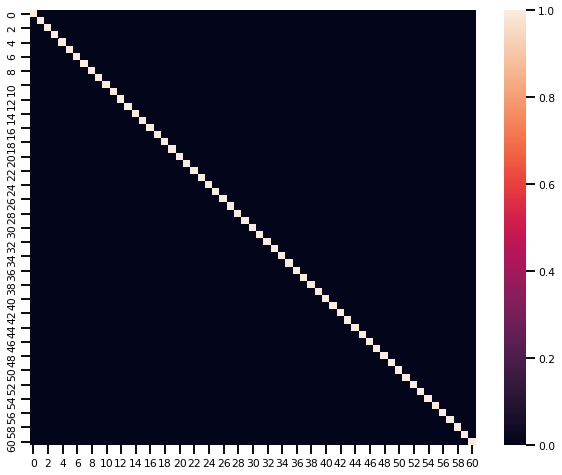

In [91]:
# Lets see correlation between these new PCA  features
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(df_train).corr())

`All principal components are uncorrelated with each other`

In [93]:
#intializing PCA with n_components=61
pca=PCA(n_components=61,random_state=randm_state,svd_solver='randomized')
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [97]:
#transforming X also using PCA, since we will use it during cross validation
pca=PCA(n_components=61,random_state=42,svd_solver='randomized')
X_pca=pca.fit_transform(X)